# Network Embedding via Random Walks with Hierarchical Softmax

## Import modules and Data

In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from matplotlib import pyplot as plt 
np.random.seed(15)

In [2]:
#Load data
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
#karate_label = np.loadtxt("karate_label.txt")

In [3]:
adj = nx.to_numpy_array(adjlist)
#label = karate_label[:,-1]

print(adj.shape)
#print(label.shape)

(34, 34)


## Binarytree class and PATH

In [4]:
class Node:
    def __init__(self,value):
        self.value = value
        self.left = None
        self.right = None

In [5]:
class BinaryTree:
    def __init__(self,head):
        self.head = head
        self.left= None
        self.right= None
    
    def insert(self,key_val):
        key = key_val[0]
        self.current_node = self.head
        
        while True:
            if key < self.current_node.value[0]:
                if self.current_node.left != None:
                    self.current_node = self.current_node.left
                else :
                    self.current_node.left = Node(key_val)
                    break
            else :
                if self.current_node.right !=None:
                    self.current_node = self.current_node.right
                else :
                    self.current_node.right = Node(key_val)
                    break
    
    def path(self,key):        
        self.current_node = self.head
        path_list = []
        way_list = []
        while key>1:
            if key%2 ==0:
                path_list.append(int(key/2))
                way_list.append(1)
            else :
                path_list.append(int((key-1)/2))
                way_list.append(-1)
            key = int(key/2)
        return np.flip(path_list), np.flip(way_list)

In [6]:
node_dicts = {}

node_k = range(1,68)
node_v = np.random.normal(0.5,0.1,(67,2))

for i in node_k:
    for x in node_v:
        node_dicts[i] = x

In [7]:
node_dicts

{1: array([0.47503826, 0.48229062]),
 2: array([0.47503826, 0.48229062]),
 3: array([0.47503826, 0.48229062]),
 4: array([0.47503826, 0.48229062]),
 5: array([0.47503826, 0.48229062]),
 6: array([0.47503826, 0.48229062]),
 7: array([0.47503826, 0.48229062]),
 8: array([0.47503826, 0.48229062]),
 9: array([0.47503826, 0.48229062]),
 10: array([0.47503826, 0.48229062]),
 11: array([0.47503826, 0.48229062]),
 12: array([0.47503826, 0.48229062]),
 13: array([0.47503826, 0.48229062]),
 14: array([0.47503826, 0.48229062]),
 15: array([0.47503826, 0.48229062]),
 16: array([0.47503826, 0.48229062]),
 17: array([0.47503826, 0.48229062]),
 18: array([0.47503826, 0.48229062]),
 19: array([0.47503826, 0.48229062]),
 20: array([0.47503826, 0.48229062]),
 21: array([0.47503826, 0.48229062]),
 22: array([0.47503826, 0.48229062]),
 23: array([0.47503826, 0.48229062]),
 24: array([0.47503826, 0.48229062]),
 25: array([0.47503826, 0.48229062]),
 26: array([0.47503826, 0.48229062]),
 27: array([0.4750382

In [8]:
def index2key(num):
    return num+34

def key2index(num):
    return num-34

In [9]:
def ReLU(x):
    return np.maximum(x,0)

In [10]:
def ReLU(x):
    return np.maximum(x,0)

In [11]:
head = Node(list(node_dicts.items())[0])
H_Softmax = BinaryTree(head)

In [12]:
V = 34
for num in range(1,2*V-1):
    k_v = list(node_dicts.items())[num]
    H_Softmax.insert(k_v)

## Nerual Network class
+ used softmax function instead of sigmoid when feed_forward
+ unlike 2-nn we made, deleted activation after hidden layer (after passing W1) sin ce its from word2back network 

+ backpropagation process is simliar to ass 2

In [13]:
#actiavtion function 
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    c = np.max(x)
    b = x-c
    exp_x = np.exp(b)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [14]:
#fully conneted network
class ann:
    def __init__(self, input_size, hidden_size,output_size):
        #setting the shape of the layer and putting random inital value 
        self.params = {}
        self.params['W1'] =  np.random.normal(0.5,0.1,(input_size,hidden_size))
        self.params['W2'] = np.random.randn(hidden_size,output_size)
    
    #Calculating the Values
    def gradient(self, x, y):
        
        #forward
        W1,W2 = self.params['W1'],self.params['W2']
        h = np.matmul(W1.T,x)
        #H = softmax(U)
        
        #U2 = np.dot(h,W2)
        #Y = softmax(U2)
        
        #fee = W1 # 34 *2
        #psi = W2 # 2 * 34
        
        #diff = Y-y # 34*1
        

            
        #ERR2 = np.outer(h,diff)
        
        
        #backpropagation
        #ERR2 = (-np.log(np.abs(Y-y)))*Y*(1-Y)
        #ERR = np.outer(x,np.dot(psi,diff))

        #return ERR,ERR2,Y,h
        return h
        

## initializing variable and params

In [15]:
w = 3 #window_size w
d = 2 #embedding size d
r = 10 # walks per vertex
t = 10 # walk length
learning_rate = 0.01

In [16]:
#Params
n_network = ann(input_size = 34,hidden_size = d,output_size = 34)
#P = np.random.random((34,d)) # Work as W1 (input_size,hidden_size)
#Q = np.random.random((d,34)) # work as W2 (hidden_size, input_size)

## Main Function
+ random_walk ( find near vertexs and choose )
+ skipgram (make windows depending on window size)
+ updated params in skipgram

In [17]:
def random_walk(vertex,t):
    ans = []
    ans.append(vertex)
    
    while True:
        #stop untill the window size get t
        if len(ans) == t:
            return ans
            
        #check nearest vertexs
        vertex_adj_list = list(adj[vertex]) 
        near_vertex_index = np.nonzero(vertex_adj_list)
    
        #choose the nearess vertex randomly
        get_vertex = np.random.choice(list(near_vertex_index[0]),1)
        ans.append(get_vertex[0])
        vertex = get_vertex[0]


In [18]:
def skipgram(W,w):
    loss = 0
    for idx, vertex in enumerate(W):
        
        #making u_list considering w
        start = idx-w
        end = idx+w
        if start < 0:
            start = 0
        if end >= len(W):
            end = len(W)-1

        u_list = []
        u_list.extend(W[start:idx])
        u_list.extend(W[idx+1:end+1])
        
        #calculating each u from u_list
        for each_u in u_list:
            
            # input, ouput with one-hot encoding
            input_vertex = np.zeros(34)
            y_pred = np.zeros(34)
            v = vertex
            u = each_u
            input_vertex[v] = 1
            y_pred[u] = 1
            
            #FORWARD AND BACKPROPAGATION
            h = n_network.gradient(input_vertex,y_pred)
            
            
            #hierarchical Softmax (total has path)
            total_list = []
            u = index2key(u) # 노드 값으로 변환
            for k in range(len(H_Softmax.path(u)[0])):
                vector_value = node_dicts[H_Softmax.path(u)[0][k]]
                vector_way = H_Softmax.path(u)[1][k]
                result = np.matmul(vector_value*vector_way,h)
                result2 = sigmoid(result)
                total_list.append(result2)
                
            #loss
     
            
            # updating answer 
            for k in range(len(H_Softmax.path(u)[0])-1,-1,-1):
                error = (total_list[k] - ReLU(H_Softmax.path(u)[1][k]))
                node_dicts[H_Softmax.path(u)[0][k]] -= learning_rate * error * h
            print(error*h)
            # hidden to output
            total_sum = 0
            for m in range(len(H_Softmax.path(u)[0])):
                error = (total_list[m] - ReLU(H_Softmax.path(u)[1][m])) 
                v_ = node_dicts[H_Softmax.path(u)[0][m]]
                total_sum += error * v_
        
            #input to hidden 
            n_network.params['W1'][key2index(u)] -= learning_rate * total_sum
            #n_network.params['W2'] -= np.reshape(learning_rate * ERR2 * H.T, (d,34))
            loss -= np.log(total_sum)
            #calculating loss
            #print(total_sum)

   
    return loss

In [22]:
H_Softmax.path(34)[1]

array([ 1,  1,  1, -1,  1])

In [19]:
epoch = 5
epoch_loss = []
epoch_loss2 = []
for _ in range(epoch):
    for i in range(r):
        O = np.arange(34)
        np.random.shuffle(O)
    
        for vertex in O:
            W = random_walk(vertex,t)
            loss2 = skipgram(W,w)
            epoch_loss.append(loss2)
            
  

[-0.19965965 -0.16984789]
[-0.19879495 -0.16911231]
[-0.19936093 -0.16982616]
[-0.15681238 -0.21447142]
[-0.15645315 -0.21398009]
[-0.15609505 -0.21349032]
[0.15750777 0.21440876]
[-0.19979819 -0.17066176]
[-0.20031307 -0.17132825]
[-0.19939843 -0.17054595]
[0.19848961 0.16976864]
[-0.1996207  -0.17073607]
[-0.16305302 -0.21890705]
[-0.1626369  -0.21834838]
[-0.16377977 -0.21895259]
[0.16335173 0.21838035]
[-0.16441994 -0.21980841]
[0.16549012 0.22033687]
[-0.17158998 -0.18727345]
[-0.17085549 -0.18647184]
[-0.1704903  -0.18607326]
[-0.16976241 -0.18527885]
[0.16903889 0.1844892 ]
[0.16921888 0.18468564]
[-0.16942101 -0.22286303]
[-0.16893091 -0.22221833]
[0.16968393 0.22241613]
[0.17093984 0.22406233]
[0.1711934  0.22439469]
[0.17195626 0.22539462]
[-0.09657406 -0.22238118]
[0.09622109 0.22156839]
[-0.09666076 -0.22258083]
[0.09630736 0.22176705]
[0.0965714  0.22237505]
[0.09596985 0.22205519]
[0.2192335  0.14941148]
[-0.22055508 -0.15031217]
[0.21949118 0.1495871 ]
[0.21975568 0.1497

<ipython-input-18-8406740df4e0>:60: RuntimeWarning: invalid value encountered in log
  loss -= np.log(total_sum)



[-0.12489434 -0.17004932]
[-0.16032107 -0.19701076]
[-0.16004721 -0.19667422]
[-0.15922876 -0.19566847]
[0.15895791 0.19533564]
[-0.15868782 -0.19500374]
[-0.1585033  -0.19428011]
[-0.14003443 -0.18812371]
[-0.1395056  -0.18741328]
[-0.13933024 -0.18717769]
[-0.13880556 -0.18647284]
[-0.13828399 -0.18577215]
[-0.15562478 -0.18971055]
[-0.15535374 -0.18938014]
[0.15500827 0.18853498]
[-0.15473597 -0.1882038 ]
[-0.15609584 -0.18917083]
[0.15516809 0.1880465 ]
[-0.15486153 -0.18767499]
[-0.17322382 -0.1215286 ]
[-0.17272716 -0.12118017]
[-0.17289216 -0.12129592]
[0.15331818 0.17941496]
[-0.1530742  -0.17912945]
[-0.15331779 -0.17941451]
[-0.15356203 -0.17970031]
[0.14926093 0.11985516]
[-0.14915762 -0.1197722 ]
[-0.14884812 -0.11952368]
[-0.14895104 -0.11960632]
[-0.14850389 -0.11909354]
[0.15838752 0.1350176 ]
[-0.15824261 -0.13489408]
[-0.15780872 -0.1345242 ]
[-0.15795288 -0.1346471 ]
[-0.15809725 -0.13477016]
[-0.15784032 -0.13446129]
[-0.14713306 -0.11770581]
[-0.14683942 -0.1174709

[0.11362252 0.14703595]
[-0.14016917 -0.12690631]
[-0.14035125 -0.12707117]
[0.14016893 0.1269061 ]
[0.13962371 0.12641247]
[0.13980457 0.12657622]
[-0.1514764  -0.09174885]
[-0.15158904 -0.09181708]
[-0.15147632 -0.0917488 ]
[0.15136372 0.0916806 ]
[0.15147623 0.09174875]
[0.15203993 0.09209018]
[ 0.05943695 -0.10686722]
[ 0.05942735 -0.10684997]
[-0.05941775  0.10683271]
[-0.05938897  0.10678096]
[-0.05943692  0.10686717]
[ 0.05944652 -0.10688443]
[-0.08186494 -0.1062614 ]
[0.08184038 0.10622952]
[0.08176672 0.10613391]
[0.08179125 0.10616574]
[-0.08181578 -0.10619759]
[0.08174216 0.10610203]
[0.12714517 0.09467304]
[0.12695301 0.09452996]
[0.12701695 0.09457757]
[-0.12733705 -0.09481592]
[0.12714446 0.09467252]
[0.12708039 0.09462481]
[0.09642253 0.10456577]
[0.09662195 0.10478203]
[0.09762671 0.10587165]
[0.09783089 0.10609308]
[0.09762628 0.10587119]
[0.11661127 0.15473599]
[0.11729186 0.15563909]
[-0.1174291 -0.1558212]
[0.11701723 0.15527468]
[-0.06826029  0.10171638]
[ 0.068271

[-0.14632272  0.05306425]
[-0.14635126  0.0530746 ]
[-0.15123674  0.0499242 ]
[-0.11276773 -0.08204058]
[-0.11267865 -0.08197577]
[0.11250073 0.08184633]
[0.11254512 0.08187863]
[0.11258955 0.08191095]
[0.11272292 0.08200798]
[ 0.16017383 -0.04418853]
[-0.16003785  0.04415101]
[-0.16516796  0.04079699]
[-0.16520418  0.04080593]
[-0.16531284  0.04083277]
[-0.17057698  0.03740316]
[0.07421612 0.10699639]
[0.0742393  0.10702981]
[0.0742625  0.10706325]
[0.0742857  0.10709671]
[0.07430892 0.10713017]
[-0.18054596  0.03093282]
[-0.18058961  0.0309403 ]
[-0.18614256  0.02732169]
[-0.18628246  0.02734223]
[-0.08340509 -0.02355282]
[-0.08341004 -0.02355421]
[-0.08342487 -0.0235584 ]
[-0.05951838 -0.0635033 ]
[-0.05943279 -0.06341198]
[-0.05917708 -0.06313914]
[-0.13050945 -0.09863542]
[-0.1301096  -0.09833323]
[-0.12971188 -0.09803264]
[-0.12931627 -0.09773365]
[-0.04877329 -0.05168338]
[-0.0485843  -0.05148311]
[-0.04852171 -0.05141678]
[-0.04833462 -0.05121853]
[-0.04827265 -0.05115287]
[-0.

[-0.06926567 -0.08352734]
[-0.06077496 -0.08526126]
[-0.06072327 -0.08518873]
[-0.06057055 -0.08486522]
[-0.06051906 -0.08479307]
[-0.01660565 -0.01748342]
[-0.01659812 -0.01747549]
[-0.0165906  -0.01746757]
[-0.47682929 -0.20694654]
[-0.47714472 -0.20708344]
[-0.4774597  -0.20722015]
[0.07665558 0.09144946]
[0.07680532 0.09162809]
[0.07685538 0.09168781]
[0.0769055 0.0917476]
[-0.30558277 -0.04285594]
[-0.30595875 -0.04290867]
[-0.30608409 -0.04292625]
[-0.30620941 -0.04294383]
[0.30658513 0.04299652]
[0.09206593 0.0746888 ]
[0.0922367  0.07482734]
[0.09229379 0.07487365]
[0.09235094 0.07492001]
[-0.09252265 -0.07505932]
[-0.09246528 -0.07501277]
[-0.60069931 -0.30393905]
[-0.60116554 -0.30417496]
[-0.60163039 -0.30441015]
[0.60209384 0.30464465]
[0.60163003 0.30440997]
[-0.60022914 -0.30370116]
[0.08505275 0.0649238 ]
[0.08511934 0.06497464]
[0.08518604 0.06502555]
[-0.08538655 -0.0651786 ]
[0.08518557 0.06502519]
[-0.08511882 -0.06497424]
[0.01403937 0.01467243]
[0.01404501 0.014678

[0.02902884 0.02578522]
[0.02908487 0.02583499]
[-0.02914112 -0.02588496]
[-0.029066   -0.02581823]
[0.02899127 0.02575184]
[0.00210125 0.00208919]
[-0.00210183 -0.00208978]
[-0.00210072 -0.00208867]
[0.00210033 0.00208828]
[0.76985465 0.39543817]
[0.76692968 0.39393575]
[0.7654441  0.39317268]
[-0.06755643 -0.09396285]
[-0.0674925  -0.09387393]
[-0.06755637 -0.09396277]
[-0.07049451 -0.08152402]
[-0.07042748 -0.0814465 ]
[-0.07049445 -0.08152395]
[-0.07029933 -0.0812599 ]
[-0.11110148 -0.07238383]
[-0.11103341 -0.07233948]
[-0.11096541 -0.07229517]
[-0.11089748 -0.07225092]
[-0.11106869 -0.0721344 ]
[-0.06932959 -0.07990901]
[-0.06926351 -0.07983285]
[-0.06907081 -0.07957548]
[-0.06913662 -0.0796513 ]
[-0.06920255 -0.07972726]
[-0.06901002 -0.07947051]
[-0.11109187 -0.07193232]
[-0.11102523 -0.07188917]
[-0.11118274 -0.07175307]
[-0.11111675 -0.07171048]
[-0.11105083 -0.07166794]
[-0.11111671 -0.07171046]
[-0.06780304 -0.07778844]
[-0.06786797 -0.07786293]
[-0.0676788  -0.07761447]
[-

[-3.12912479 -2.56264556]
[-3.12912985 -2.56264972]
[-3.12913106 -2.56265071]
[-0.01228479 -0.02701719]
[0.01228426 0.02701602]
[0.01228466 0.0270169 ]
[0.01228479 0.02701719]
[0.01228519 0.02701806]
[1.41338961 0.9466503 ]
[-1.41279002 -0.94624871]
[-1.41324595 -0.94655408]
[-1.41366424 -0.94683424]
[-1.41404797 -0.94709125]
[-1.41439995 -0.947327  ]
[-1.1853077  -1.18142401]
[-1.18558224 -1.18169766]
[-1.18583477 -1.18194936]
[-1.18591436 -1.18202869]
[-1.18614023 -1.18225382]
[-1.18621142 -1.18232477]
[-3.51546435 -2.89508986]
[-3.51546443 -2.89508993]
[-3.51546445 -2.89508994]
[-3.51546448 -2.89508997]
[-3.51546449 -2.89508998]
[-3.5154645  -2.89508998]
[0.04169727 0.04330279]
[0.04170591 0.04331176]
[0.04173183 0.04333868]
[0.04175778 0.04336563]
[0.04176644 0.04337462]
[-0.04180976 -0.04341962]
[-1.54344124 -1.05760075]
[-1.54348992 -1.0576341 ]
[-1.54353375 -1.05766414]
[-1.54354736 -1.05767347]
[1.54360873 1.05771552]
[-2.57745886 -2.24637293]
[-2.57745905 -2.24637309]
[-2.5774

[0.05364828 0.03960324]
[0.053782   0.03954158]
[0.05379069 0.03954796]
[0.05379937 0.03955435]
[0.05382544 0.03957351]
[-2.02206134 -1.46542304]
[-2.02206506 -1.46542574]
[-2.05432674 -1.49276414]
[-2.05432961 -1.49276623]
[-2.05433721 -1.49277175]
[-2.0876223  -1.52085391]
[-0.75178207 -0.60480439]
[-0.7518782  -0.60488173]
[-0.75197348 -0.60495838]
[-0.75206789 -0.60503434]
[-0.75216145 -0.60510961]
[-0.75225417 -0.6051842 ]
[-2.22084409 -1.63311732]
[-2.2208449  -1.63311791]
[-2.25522939 -1.66203844]
[-2.25523105 -1.66203967]
[-2.25523152 -1.66204001]
[2.29074272 1.69179091]
[-0.03009773  0.04197481]
[-0.03009857  0.04197597]
[-0.03010106  0.04197946]
[-0.0301019   0.04198062]
[ 0.03010273 -0.04198178]
[-0.03010106  0.04197946]
[-2.35959622 -1.74950905]
[-2.35959703 -1.74950965]
[-2.3956083  -1.77960052]
[2.39560847 1.77960065]
[-2.39560811 -1.77960038]
[3.90004909e-05 3.47488183e-05]
[3.90005373e-05 3.47488597e-05]
[3.90005837e-05 3.47489010e-05]
[3.90006301e-05 3.47489424e-05]
[-

[-2.70223788 -2.03665783]
[-2.70223941 -2.03665899]
[-2.73037448 -2.06015938]
[2.73037558 2.06016021]
[-2.73037325 -2.06015845]
[2.75850805 2.08365865]
[5.01626442e-05 4.41117389e-05]
[5.01627409e-05 4.41118239e-05]
[5.01628376e-05 4.41119089e-05]
[5.01629343e-05 4.41119939e-05]
[-5.01630309e-05 -4.41120790e-05]
[-5.01631276e-05 -4.41121640e-05]
[-2.75851101 -2.08366104]
[-2.75851189 -2.08366171]
[2.78747342 2.10778639]
[2.78747193 2.10778526]
[2.78747272 2.10778586]
[-0.0205607  -0.03075419]
[0.02056092 0.03075453]
[-0.02056048 -0.03075386]
[0.0205607  0.03075419]
[-1.27739945e-07 -1.22181828e-07]
[1.27739942e-07 1.22181826e-07]
[-1.27739943e-07 -1.22181826e-07]
[-0.11993437 -0.15018353]
[0.12002015 0.15029095]
[-0.11995148 -0.15020497]
[-3.78650574 -3.26965727]
[3.78650575 3.26965728]
[-3.78650568 -3.26965722]
[-3.92984648 -3.38973355]
[2.0661550e-09 1.9483612e-09]
[2.0661550e-09 1.9483612e-09]
[2.0661550e-09 1.9483612e-09]
[2.06615500e-09 1.94836121e-09]
[-2.06615483e-09 -1.94836105

[-0.00373052 -0.00390611]
[-0.00373082 -0.00390643]
[-0.00372897 -0.00390441]
[0.0612295  0.06630657]
[0.06122659 0.06630341]
[0.06122367 0.06630025]
[0.06122659 0.06630341]
[-0.00324331 -0.00337176]
[-0.00324194 -0.00337028]
[-0.00324217 -0.00337052]
[-0.0032424  -0.00337076]
[-0.0032417  -0.00337004]
[-0.05473968 -0.03411535]
[-0.05472346 -0.03410523]
[-0.05473968 -0.03411534]
[-0.05472345 -0.03410523]
[-0.05467482 -0.03407492]
[-0.05465863 -0.03406483]
[-5.17556496e-09 -4.86504087e-09]
[-5.17556496e-09 -4.86504087e-09]
[-5.17556496e-09 -4.86504087e-09]
[-5.17556496e-09 -4.86504087e-09]
[-5.17556496e-09 -4.86504087e-09]
[-5.17556496e-09 -4.86504087e-09]
[-0.00148295 -0.00131672]
[-0.0014829  -0.00131667]
[-0.00148295 -0.00131672]
[-0.00148279 -0.00131658]
[-0.00148284 -0.00131663]
[-0.00148269 -0.00131648]
[0.06668407 0.07103789]
[0.06668764 0.0710417 ]
[0.06667692 0.07103028]
[0.06667335 0.07102647]
[0.06666264 0.07101506]
[0.06665907 0.07101125]
[-3.82969802e-13 -3.47251575e-13]
[-

<ipython-input-18-8406740df4e0>:60: RuntimeWarning: divide by zero encountered in log
  loss -= np.log(total_sum)



[0. 0.]
[0. 0.]
[-2.73708781e-08 -2.77212470e-08]
[-2.73708781e-08 -2.77212470e-08]
[-2.73708781e-08 -2.77212470e-08]
[-3.15445627 -2.83705922]
[-3.15445627 -2.83705922]
[-3.15445627 -2.83705922]
[-3.94889621 -3.067108  ]
[-3.94889621 -3.067108  ]
[-3.94889621 -3.067108  ]
[3.94889621 3.067108  ]
[-0.2511141  -0.12810574]
[-0.25114513 -0.12812157]
[-0.25115546 -0.12812684]
[0.25114513 0.12812157]
[-0.2511141  -0.12810574]
[4.59700907e-15 4.63947458e-15]
[4.59700907e-15 4.63947458e-15]
[4.59700907e-15 4.63947458e-15]
[-4.68513779e-15 -4.72841740e-15]
[4.59700907e-15 4.63947458e-15]
[-4.68513779e-15 -4.72841740e-15]
[1.21229289e-28 1.11619185e-28]
[1.21229289e-28 1.11619185e-28]
[1.21229289e-28 1.11619185e-28]
[1.21229289e-28 1.11619185e-28]
[0. 0.]
[1.21229289e-28 1.11619185e-28]
[5.59603126e-05 5.17365355e-05]
[5.59603519e-05 5.17365719e-05]
[-5.59603126e-05 -5.17365355e-05]
[-5.59601947e-05 -5.17364266e-05]
[5.59601554e-05 5.17363902e-05]
[-5.59600376e-05 -5.17362813e-05]
[1.89529100

[0.11690252 0.11711675]
[0.11688718 0.11710138]
[0.1168923 0.1171065]
[0.18581993 0.17601649]
[0.01814468 0.0181679 ]
[0.01814476 0.01816798]
[0.01814453 0.01816774]
[0.0181446  0.01816782]
[0.01814468 0.0181679 ]
[0.05396205 0.04856471]
[0.32783681 0.29528034]
[0.32781051 0.29525664]
[0.4028594  0.35780511]
[0.40286588 0.35781087]
[0.40287234 0.35781661]
[0.20861959 0.17820786]
[0.20862922 0.17821609]
[0.28362743 0.24070243]
[0.28363753 0.240711  ]
[0. 0.]
[0. 0.]
[0. 0.]
[-12.42415479 -10.41126604]
[-12.42415479 -10.41126604]
[-12.42415479 -10.41126604]
[-6.0936627  -4.84511192]
[-6.0936627  -4.84511192]
[-6.0936627  -4.84511192]
[-6.0936627  -4.84511192]
[-3.72350337 -2.98954847]
[-3.72350337 -2.98954847]
[-3.72350337 -2.98954847]
[-3.72350337 -2.98954847]
[3.72350337 2.98954847]
[-13.72353916 -11.3897756 ]
[-13.72353916 -11.3897756 ]
[-13.72353916 -11.3897756 ]
[-13.72353916 -11.3897756 ]
[13.72353916 11.3897756 ]
[-13.72353916 -11.3897756 ]
[-0.70143489 -0.44720369]
[-0.70143494 -

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.64902144 -1.30609801]
[1.64902144 1.30609801]
[-1.64902144 -1.30609801]
[-9.60625107 -7.74420874]
[9.60625107 7.74420874]
[-9.60625107 -7.74420874]
[-9.60625107 -7.74420874]
[9.66234442e-141 8.33675512e-141]
[9.66234442e-141 8.33675512e-141]
[9.66234442e-141 8.33675512e-141]
[9.66234442e-141 8.33675512e-141]
[0. 0.]
[-15.18762871 -12.69428338]
[-15.18762871 -12.69428338]
[15.18762871 12.69428338]
[-15.18762871 -12.69428338]
[15.18762871 12.69428338]
[-15.18762871 -12.69428338]
[-10.02710343  -8.09071075]
[10.16636525  8.20532793]
[-10.16636525  -8.20532793]
[10.16636525  8.20532793]
[-10.16636525  -8.20532793]
[10.16636525  8.20532793]
[0. 0.]
[2.24189520e-40 1.85302977e-40]
[2.24189520e-40 1.85302977e-40]
[2.24189520e-40 1.85302977e-40]
[0. 0.]
[2.24189520e-40 1.85302977e-40]
[-2.3972027  -1.84611421]
[-2.3972027  -

<ipython-input-13-45bf4f01db3c>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))



[0. 0.]
[1.02065119e-33 8.06633940e-34]
[0. 0.]
[0. 0.]
[1.02065119e-33 8.06633940e-34]
[0. 0.]
[0. 0.]
[13.0722625  10.59879751]
[13.0722625  10.59879751]
[-13.0722625  -10.59879751]
[13.0722625  10.59879751]
[13.0722625  10.59879751]
[13.0722625  10.59879751]
[0.81806308 0.6996447 ]
[-0.81806308 -0.6996447 ]
[-0.81806308 -0.6996447 ]
[0.81806308 0.6996447 ]
[0.81806308 0.6996447 ]
[2.74865712e-60 2.42474502e-60]
[2.74865712e-60 2.42474502e-60]
[0. 0.]
[0. 0.]
[7.20105143e-294 6.12554831e-294]
[0. 0.]
[0. 0.]
[-4.36101765 -3.51726241]
[-4.36101765 -3.51726241]
[-4.36101765 -3.51726241]
[-13.47946032 -10.93397253]
[-13.47946032 -10.93397253]
[-13.47946032 -10.93397253]
[-13.47946032 -10.93397253]
[-4.18903136 -3.44876474]
[-4.18903136 -3.44876474]
[-4.18903136 -3.44876474]
[-4.18903136 -3.44876474]
[-4.18903136 -3.44876474]
[-31.68618606 -26.18851493]
[-31.68618606 -26.18851493]
[-31.68618606 -26.18851493]
[-31.68618606 -26.18851493]
[-31.68618606 -26.18851493]
[-32.43420972 -26.80397

[2.32261224 1.93958709]
[2.32261224 1.93958709]
[2.32261224 1.93958709]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.5376755  1.35583596]
[1.5376755  1.35583596]
[1.5376755  1.35583596]
[1.5376755  1.35583596]
[1.5376755  1.35583596]
[1.5376755  1.35583596]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.32261224 1.93958709]
[2.32261224 1.93958709]
[2.32261224 1.93958709]
[2.32261224 1.93958709]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.82121126e-227 2.38650496e-227]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.66711664e-85 5.13958666e-85]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.52616888 4.5826384 ]
[-5.52

[-41.68489668 -34.2140944 ]
[42.72729887 35.07427356]
[-4.94734637 -4.1104425 ]
[-4.94734637 -4.1104425 ]
[-4.94734637 -4.1104425 ]
[-4.94734637 -4.1104425 ]
[4.94734637 4.1104425 ]
[4.94734637 4.1104425 ]
[-45.84762405 -37.64922126]
[-45.84762405 -37.64922126]
[-46.90508202 -38.52177476]
[46.90508202 38.52177476]
[46.90508202 38.52177476]
[-46.90508202 -38.52177476]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-5.74974464 -4.65774851]
[5.74974464 4.65774851]
[5.74974464 4.65774851]
[-5.74974464 -4.65774851]
[49.00066096 40.25100728]
[49.00066096 40.25100728]
[-49.00066096 -40.25100728]
[-32.73026257 -27.00576757]
[-32.73026257 -27.00576757]
[-32.73026257 -27.00576757]
[-132.0706551  -109.01349385]
[-132.0706551  -109.01349385]
[-132.0706551  -109.01349385]
[-132.0706551  -109.01349385]
[-27.27349365 -22.75094938]
[-27.27349365 -22.75094938]
[-27.27349365 -22.75094938]
[-27.27349365 -22.75094938]
[-27.27349365 -22.75094938]
[-52.38327237 -43.

[0. 0.]
[4.74219173e-91 4.05461691e-91]
[4.74219173e-91 4.05461691e-91]
[0. 0.]
[0. 0.]
[4.74219173e-91 4.05461691e-91]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[98.851573  81.3866107]
[98.851573  81.3866107]
[-98.851573  -81.3866107]
[-99.40640422 -81.84455697]
[8.0109576  6.63543821]
[-8.0109576  -6.63543821]
[-8.0109576  -6.63543821]
[-8.0109576  -6.63543821]
[-8.0109576  -6.63543821]
[100.53674905  82.77748198]
[-100.53674905  -82.77748198]
[101.10552639  83.24693043]
[-101.10552639  -83.24693043]
[-101.10552639  -83.24693043]
[101.10552639  83.24693043]
[-27.10008542 -22.30846975]
[27.10008542 22.30846975]
[-27.10008542 -22.30846975]
[-27.10008542 -22.30846975]
[27.10008542 22.30846975]
[27.10008542 22.30846975]
[206.70171111 170.59745887]
[-206.70171111 -170.59745887]
[-206.70171111 -170.59745887]
[206.70171111 170.59745887]
[206.70171111 170.59745887]
[206.70171111 170.59745887]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-11.02511975 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[10.53643377  8.71451225]
[13.74119179 11.33737388]
[13.74119179 11.33737388]
[13.74119179 11.33737388]
[13.74119179 11.33737388]
[15.81880497 13.0695053 ]
[15.81880497 13.0695053 ]
[17.57505748 14.51742201]
[11.02511975  9.12295406]
[11.02511975  9.12295406]
[11.02511975  9.12295406]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[-37.89319898 -31.11620489]
[37.89319898 31.11620489]
[-37.89319898 -31.11620489]
[-37.89319898 -31.11620489]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-627.00159565 -517.11327016]
[-627.00159565 -517.11327016]
[627.00159565 517.11327016]
[-627.00159565 -517.11327016]
[-627.00159565 -517.11327016]
[-627.00159565 -517.11327016]
[-82.0803829  -67.63925053]
[82.0803829  67.63925053]
[-82.0803829  -67.63925053]
[-82.0803829  -67.63925053]
[-82.0803829  -67.63925053]
[295.54525893 243.55208181]
[-295.54525893 -243.55208181]
[-295.54525893 -243.55208181]
[-295.54525893 -243.55208181]
[-59.42190846 -48.86334694]
[-59.42190846 -48.86334694]
[-59.42190846 -48.86334694]
[22.70105691 18.74179765]
[22.70105691 18.74179765]
[22.70105691 18.74179765]
[28.25662858 23.30251881]
[28.25662858 23.30251881]
[28.25662858 23.30251881]
[28.25662858 23.30251881]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[31.64079043 26.11106286]
[31.64079043 26.11106286]
[3

[93.81005385 77.41667575]
[93.81005385 77.41667575]
[-93.81005385 -77.41667575]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-500.1689786  -412.54382351]
[500.1689786  412.54382351]
[500.1689786  412.54382351]
[-500.1689786  -412.54382351]
[-500.1689786  -412.54382351]
[-500.1689786  -412.54382351]
[1282.05154452 1057.10527166]
[1282.05154452 1057.10527166]
[-1282.05154452 -1057.10527166]
[-1282.05154452 -1057.10527166]
[-1282.05154452 -1057.10527166]
[1282.05154452 1057.10527166]
[455.12905429 375.10367635]
[-455.12905429 -375.10367635]
[-455.12905429 -375.10367635]
[-455.12905429 -375.10367635]
[455.12905429 375.10367635]
[455.12905429 375.10367635]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-57.67171057 -47.57771972]
[-57.67171057 -47.57771972]
[57.67171057 47.57771972]
[-57.67171057 -47.57771972]
[-468.44059325 -386.07558139]
[468.44059325 386.07558139]
[468.44059325 386.07558139]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[-1344.75623016 -1108.4505158 ]
[-4316.29626078 -3558.34224432]
[-4316.29626078 -3558.34224432]
[-4419.01959791 -3643.02094509]
[-4419.01959791 -3643.02094509]
[-303.31454863 -250.08431287]
[-303.31454863 -250.08431287]
[-303.31454863 -250.08431287]
[-259.10080654 -213.56481834]
[-259.10080654 -213.56481834]
[-259.10080654 -213.56481834]
[-4736.92393947 -3905.08212343]
[-4736.92393947 -3905.08212343]
[-4736.92393947 -3905.08212343]
[-4736.92393947 -3905.08212343]
[-375.1695971  -309.31733122]
[-375.1695971  -309.31733122]
[-375.1695971  -309.31733122]
[-375.1695971  -309.31733122]
[375.1695971  309.31733122]
[-1558.48288709 -1284.6339241 ]
[-1558.48288709 -1284.6339241 ]
[-1558.48288709 -1284.6339241 ]
[-1558.48288709 -1284.6339241 ]
[1558.48288709 1284.6339241 ]
[1558.48288709 1284.6339241 ]
[-5320.09491939 -4385.81540795]
[-5442.46786417 -4486.69295436]
[-5442.46786417 -4486.69295436]
[5442.46786417 4486.69295436]
[5442.46786417 4486.69295436]
[5442.46786417 4486.69295436]
[0. 0.]
[0

[219.13277535 180.72219162]
[-219.13277535 -180.72219162]
[-2599.46072756 -2143.04629435]
[2599.46072756 2143.04629435]
[-2599.46072756 -2143.04629435]
[2599.46072756 2143.04629435]
[-2599.46072756 -2143.04629435]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2653.6768489  -2187.73139912]
[-2653.6768489  -2187.73139912]
[2715.85400079 2238.97969809]
[0. 0.]
[0. 0.]
[0. 0.]
[7028.49061735 5794.10386028]
[-7028.49061735 -5794.10386028]
[-7028.49061735 -5794.10386028]
[-7028.49061735 -5794.10386028]
[550.26881315 453.58487869]
[-550.26881315 -453.58487869]
[-550.26881315 -453.58487869]
[-550.26881315 -453.58487869]
[-550.26881315 -453.58487869]
[2830.40747017 2333.11497437]
[-2830.40747017 -2333.11497437]
[-2830.40747017 -2333.11497437]
[-2830.40747017 -2333.11497437]
[-2830.40747017 -2333.11497437]
[-2830.40747017 -2333.11497437]
[-2248.12001693 -1853.24832872]
[-2248.12001693 -1853.24832872]
[-2248.12001693 -1853.24832872]
[-2248.12001693 -1853.24832872]
[-2248.12001693 -1853.24832872]
[-2248.12001

[-10557.25264465  -8702.84203692]
[-10557.25264465  -8702.84203692]
[-10557.25264465  -8702.84203692]
[-10557.25264465  -8702.84203692]
[10557.25264465  8702.84203692]
[-931.40911127 -767.66203229]
[-931.40911127 -767.66203229]
[-931.40911127 -767.66203229]
[931.40911127 767.66203229]
[0. 0.]
[0. 0.]
[0. 0.]
[253.67448814 209.14284067]
[-253.67448814 -209.14284067]
[253.67448814 209.14284067]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[351.72569583 289.86380433]
[351.72569583 289.86380433]
[351.72569583 289.86380433]
[-351.72569583 -289.86380433]
[-441.72534009 -364.05209391]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[441.72534009 364.05209391]
[-441.72534009 -364.05209391]
[531.59246674 438.13116786]
[-531.59246674 -438.13116786]
[-531.59246674 -438.13116786]
[-531.59246674 -438.13116786]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[11097.77548494  9148.40453761]
[-11097.77548494  -9148.40453761]
[-11097.77548494  -9148.40453761]
[-11097.77548494  -9148.40453761]
[11097.77548494  9148.

[0. 0.]
[0. 0.]
[0. 0.]
[6374.81108378 5254.78869089]
[-6374.81108378 -5254.78869089]
[-6374.81108378 -5254.78869089]
[-6374.81108378 -5254.78869089]
[-6374.81108378 -5254.78869089]
[15540.5906993  12810.67919255]
[-15540.5906993  -12810.67919255]
[-15540.5906993  -12810.67919255]
[-15540.5906993  -12810.67919255]
[-15540.5906993  -12810.67919255]
[-15540.5906993  -12810.67919255]
[-1069.69978655  -881.75512245]
[-1069.69978655  -881.75512245]
[-1069.69978655  -881.75512245]
[-1069.69978655  -881.75512245]
[-1069.69978655  -881.75512245]
[-1069.69978655  -881.75512245]
[-6875.07105415 -5667.16051251]
[-6979.15280967 -5752.95670566]
[-6979.15280967 -5752.95670566]
[-6979.15280967 -5752.95670566]
[-6979.15280967 -5752.95670566]
[6979.15280967 5752.95670566]
[-5372.54479096 -4428.62662945]
[-5372.54479096 -4428.62662945]
[-5372.54479096 -4428.62662945]
[-5372.54479096 -4428.62662945]
[5372.54479096 4428.62662945]
[5372.54479096 4428.62662945]
[-17481.95142204 -14410.97210429]
[-17481.9514

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[34019.60144249 28043.23717408]
[34019.60144249 28043.23717408]
[34019.60144249 28043.23717408]
[-34019.60144249 -28043.23717408]
[1782.52640467 1469.42255423]
[1782.52640467 1469.42255423]
[-1782.52640467 -1469.42255423]
[0. 0.]
[0. 0.]
[0. 0.]
[8972.91611158 7396.68704898]
[8972.91611158 7396.68704898]
[-8972.91611158 -7396.68704898]
[10166.29000569  8380.40662635]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[10166.29000569  8380.40662635]
[-10166.29000569  -8380.40662635]
[11334.2481748   9343.17518715]
[11334.2481748   9343.17518715]
[-11334.2481748   -9343.17518715]
[11334.2481748   9343.17518715]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5800.50442456 4781.49008352]
[5800.50442456 4781.49008352]
[5800.50442456 4781.49008352]
[5800.50442456 4781.49008352]
[5800.50442456 4781.49008352]
[5800.50442456 4781.49008352]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1891.92734205 1559.63691949]
[1891.92734205 1559.63691949]
[1891.92734205 1559.63691949]
[1891.92734205 1559.63691949]
[0. 0.]
[0. 0.]
[0. 0.]
[-2735.37401709 -2254.87110084]
[-2735.37401709 -2254.87110084]
[2735.37401709 2254.87110084]
[-52520.28675007 -43293.65648564]
[-52520.28675007 -43293.65648564]
[52520.28675007 43293.65648564]
[-52520.28675007 -43293.65648564]
[-3789.83356016 -3123.90722499]
[-3789.83356016 -3123.90722499]
[3789.83356016 3123.90722499]
[-3789.83356016 -3123.90722499]
[-3789.83356016 -3123.9072

[69162.13531841 57011.77034041]
[69162.13531841 57011.77034041]
[-69162.13531841 -57011.77034041]
[-69162.13531841 -57011.77034041]
[-69162.13531841 -57011.77034041]
[-70322.02421748 -57967.88398912]
[12997.60974148 10714.17342182]
[-12997.60974148 -10714.17342182]
[-12997.60974148 -10714.17342182]
[-12997.60974148 -10714.17342182]
[-12997.60974148 -10714.17342182]
[12997.60974148 10714.17342182]
[-72856.66737119 -60057.22919052]
[-72856.66737119 -60057.22919052]
[-74177.45115577 -61145.97175881]
[-74177.45115577 -61145.97175881]
[74177.45115577 61145.97175881]
[-68235.91335745 -56248.07911386]
[-68235.91335745 -56248.07911386]
[-68235.91335745 -56248.07911386]
[68235.91335745 56248.07911386]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[33672.94619785 27757.05333917]
[-33672.94619785 -27757.05333917]
[-33672.94619785 -27757.05333917]
[33672.94619785 27757.05333917]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5756.78244301 4745.33634271]
[-5756.78244301 -4745.33634271]
[-5756.78244301 

[-147573.50777773 -121647.38897822]
[154252.60787249 127153.08486675]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[154252.60787249 127153.08486675]
[-154252.60787249 -127153.08486675]
[160546.07644756 132340.89804311]
[160546.07644756 132340.89804311]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-6763.54901386 -5575.32883526]
[6763.54901386 5575.32883526]
[-6763.54901386 -5575.32883526]
[6763.54901386 5575.32883526]
[6763.54901386 5575.32883526]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-17118.49053365 -14111.3262267 ]
[17118.49053365 14111.3262267 ]
[-17118.49053365 -14111.3262267 ]
[-152745.28637336 -125910.74617815]
[152745.28637336 125910.74617815]
[-152745.28637336 -125910.74617815]
[152745.28637336 125910.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[232010.80919545 191250.49092237]
[-232010.80919545 -191250.49092237]
[241185.40940373 198813.26908237]
[-241185.40940373 -198813.26908237]
[-241185.40940373 -198813.26908237]
[250601.19502141 206574.86051144]
[-28200.74648216 -23246.41833637]
[28200.74648216 23246.41833637]
[-28200.74648216 -23246.41833637]
[-28200.74648216 -23246.41833637]
[28200.74648216 23246.41833637]
[28200.74648216 23246.41833637]
[277655.15291564 228875.8962373 ]
[-277655.15291564 -228875.8962373 ]
[-286779.06558594 -236396.89193931]
[286779.06558594 236396.89193931]
[286779.06558594 236396.89193931]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-104208.78927118  -85900.93515036]
[-104208.78927118  -85900.93515036]
[104208.78927118  85900.93515036]
[-104208.78927118  -85900.93515036]
[-48287.87384864 -39804.38679812]
[-48287.87384864 -39804.38679812]
[48287.87384864 39804.38679812]
[-48287.87384864 -39804.38679812]
[-48287.87384864 -39804.386798

[57334.46756326 47261.79877056]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[61770.89971268 50918.67271693]
[61770.89971268 50918.67271693]
[61770.89971268 50918.67271693]
[61770.89971268 50918.67271693]
[61770.89971268 50918.67271693]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-51880.60986496 -42766.13175498]
[51880.60986496 42766.13175498]
[51880.60986496 42766.13175498]
[51880.60986496 42766.13175498]
[-51880.60986496 -42766.13175498]
[56936.44054017 46933.73808879]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[56936.44054017 46933.73808879]
[-56936.44054017 -46933.73808879]
[61958.10935105 51073.18417974]
[61958.10935105 51073.18417974]
[-61958.10935105 -51073.18417974]
[-61958.10935105 -51073.18417974]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[649624.18419396 535496.4255428 ]
[-649624.18419396 -535496.4255428 ]
[649624.18419396 535496.4255428 ]
[-649624.18419

[18871.50136039 15556.18503619]
[18871.50136039 15556.18503619]
[23853.58369511 19662.99845826]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[23853.58369511 19662.99845826]
[23853.58369511 19662.99845826]
[28828.50995473 23763.9129808 ]
[28828.50995473 23763.9129808 ]
[28828.50995473 23763.9129808 ]
[28828.50995473 23763.9129808 ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[21044.63827165 17347.48818689]
[21044.63827165 17347.48818689]
[21044.63827165 17347.48818689]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[99601.61913343 82103.31772625]
[99601.61913343 82103.31772625]
[99601.61913343 82103.31772625]
[99601.61913343 82103.31772625]
[99601.61913343 82103.31772625]
[99601.61913343 82103.31772625]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-95184.95735403 -78462.47168358]
[-95184.95735403 -78462.47168358]
[-95184.95735403 -78462.47168358]
[-95184.95735403 -78462.47168358]
[95184.95735403 78462.47168358]
[-95184.95735403 -78462.47168358]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1031479.99546826  -850266.33632741]
[-1031479.99546826  -850266.33632741]
[1031479.99546826  850266.33632741]
[-189389.95416458 -156117.25685593]
[189389.95416458 156117.25685593]
[189389.95416458 156117.25685593]
[-1365761.50773772 -1125820.36328666]
[1365761.50773772 1125820.36328666]
[1365761.50773772 1125820.36328666]
[1365761.50773772 1125820.36328666]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[-1786937.41259439 -1473002.70717477]
[-1786937.41259439 -1473002.70717477]
[-1786937.41259439 -1473002.70717477]
[1786937.41259439 1473002.70717477]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-45960.36494101 -37885.91972522]
[45960.36494101 37885.91972522]
[45960.36494101 37885.91972522]
[45960.36494101 37885.91972522]
[-56779.2066439 -46804.0594868]
[56779.2066439 46804.0594868]
[56779.2066439 46804.0594868]
[56779.2066439 46804.0594868]
[66882.00655792 55131.9669847 ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[66882.00655792 55131.9669847 ]
[66882.00655792 55131.9669847 ]
[77004.87107391 63476.4140727 ]
[77004.87107391 63476.4140727 ]
[77004.87107391 63476.4140727 ]
[77004.87107391 63476.4140727 ]
[96519.15734278 79562.38070221]
[96519.15734278 79562.38070221]
[96519.15734278 79562.38070221]
[96519.15734278 79562.38070221]
[96519.15734278 79562.38070221]
[106616.96896882  87886.17626932]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[106

[0. 0.]
[-204714.42269321 -168749.57578686]
[-204714.42269321 -168749.57578686]
[-204714.42269321 -168749.57578686]
[-1902808.96329343 -1568517.19201589]
[-1902808.96329343 -1568517.19201589]
[-1902808.96329343 -1568517.19201589]
[1902808.96329343 1568517.19201589]
[-7070464.00521655 -5828302.27910385]
[-7070464.00521655 -5828302.27910385]
[-7070464.00521655 -5828302.27910385]
[7070464.00521655 5828302.27910385]
[-7070464.00521655 -5828302.27910385]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-299543.08809824 -246918.30323515]
[299543.08809824 246918.30323515]
[-299543.08809824 -246918.30323515]
[299543.08809824 246918.30323515]
[-299543.08809824 -246918.30323515]
[299543.08809824 246918.30323515]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[3161369.27241852 2605969.5508635 ]
[3161369.27241852 2605969.5508635 ]
[-3161369.27241852 -2605969.5508635 ]
[-517416.80344238 -426515.36852788]
[517416.80344238 426515.36852788]
[-517416.80344238 -426515.36852788]
[517416.80344238 426515.36852788]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-9287580.5685968  -7655908.62813178]
[9287580.5685968  7655908.62813178]
[9287580.5685968  7655908.62813178]
[9287580.5685968  7655908.62813178]
[9287580.5685968  7655908.62813178]
[-9287580.5685968  -7655908.62813178]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3236134.32903934 2667599.63920213]
[3236134.32903934 2667599.63920213]
[-3236134.32903934 -2667599.63920213]
[-3236134.32903934 -2667599.63920213]
[-3236134.32903934 -2667599.63920213]
[512278.7969264  422280.04626619]
[-512278.7969264  -422280.04626619]
[-512278.7969264  -422280.04626619]
[-512278.7969264  -422280.04626619]
[-3326924.85904669

[-5721384.86084829 -4716233.56129   ]
[5721384.86084829 4716233.56129   ]
[5721384.86084829 4716233.56129   ]
[55841435.70109791 46031031.90501536]
[-55841435.70109791 -46031031.90501536]
[55841435.70109791 46031031.90501536]
[55841435.70109791 46031031.90501536]
[-55841435.70109791 -46031031.90501536]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[566674.19067821 467118.94799171]
[566674.19067821 467118.94799171]
[-566674.19067821 -467118.94799171]
[-566674.19067821 -467118.94799171]
[-566674.19067821 -467118.94799171]
[-907053.17687437 -747699.05478588]
[14646891.36094652 12073678.01045012]
[-14646891.36094652 -12073678.01045012]
[-14646891.36094652 -12073678.01045012]
[-14646891.36094652 -12073678.01045012]
[-14646891.36094652 -12073678.01045012]
[-1577739.73594941 -1300557.23357786]
[-1577739.73594941 -1300557.23357786]
[-1915280.04919107 -1578797.37467542]
[-1915280.04919107 -1578797.

[-2694857.8409645  -2221416.54745991]
[-2694857.8409645  -2221416.54745991]
[-2694857.8409645  -2221416.54745991]
[-70920018.34283184 -58460560.61267523]
[-70920018.34283184 -58460560.61267523]
[-70920018.34283184 -58460560.61267523]
[-72363221.53339002 -59650217.2042978 ]
[-6424435.39168812 -5295769.70982834]
[-6424435.39168812 -5295769.70982834]
[-6424435.39168812 -5295769.70982834]
[-6424435.39168812 -5295769.70982834]
[-6424435.39168812 -5295769.70982834]
[-75401082.35005906 -62154376.81855309]
[-75401082.35005906 -62154376.81855309]
[-77021094.37560993 -63489779.89788422]
[-77021094.37560993 -63489779.89788422]
[-77021094.37560993 -63489779.89788422]
[-77021094.37560993 -63489779.89788422]
[-32622852.25941625 -26891564.13664186]
[-32622852.25941625 -26891564.13664186]
[-32622852.25941625 -26891564.13664186]
[-32622852.25941625 -26891564.13664186]
[-32622852.25941625 -26891564.13664186]
[32622852.25941625 26891564.13664186]
[-34740566.20215922 -28637231.14851015]
[-34740566.2021592

[-1.52937983e+08 -1.26069344e+08]
[-1.52937983e+08 -1.26069344e+08]
[-19646275.66069226 -16194754.48873076]
[-19646275.66069226 -16194754.48873076]
[-19646275.66069226 -16194754.48873076]
[-19646275.66069226 -16194754.48873076]
[-1.66724839e+08 -1.37434081e+08]
[-1.66724839e+08 -1.37434081e+08]
[-1.70401092e+08 -1.40464478e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.70401092e+08 -1.40464478e+08]
[1.70401092e+08 1.40464478e+08]
[-1.70401092e+08 -1.40464478e+08]
[-1.70401092e+08 -1.40464478e+08]
[1.70401092e+08 1.40464478e+08]
[1.70401092e+08 1.40464478e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-23475889.84768087 -19351569.6856234 ]
[-23475889.84768087 -19351569.6856234 ]
[-23475889.84768087 -19351569.6856234 ]
[-59802176.37399

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[84921166.63154289 70001941.59475264]
[-84921166.63154289 -70001941.59475264]
[-84921166.63154289 -70001941.59475264]
[-85671251.45425056 -70620249.09287603]
[55970412.81071395 46137349.82987748]
[-55970412.81071395 -46137349.82987748]
[-55970412.81071395 -46137349.82987748]
[-55970412.81071395 -46137349.82987748]
[-55970412.81071395 -46137349.82987748]
[87217226.80925737 71894622.50359556]
[-87217226.80925737 -71894622.50359556]
[-88017873.53240682 -72554609.02409439]
[-88017873.53240682 -72554609.02409439]
[-88017873.53240682 -72554609.02409439]
[-88017873.53240682 -72554609.02409439]
[-55319011.71459863 -45600389.30594513]
[-55319011.71459863 -45600389.30594513]
[-55319011.71459863 -45600389.30594513]
[-55319011.71459863 -45600389.30594513]
[-55319011.71459863 -45600389.30594513]
[-55319011.71459863 -4

[-1.66113490e+08 -1.36930135e+08]
[-1.66113490e+08 -1.36930135e+08]
[-1.66113490e+08 -1.36930135e+08]
[-1.69745669e+08 -1.39924201e+08]
[-1.67059615e+08 -1.37710042e+08]
[-1.67059615e+08 -1.37710042e+08]
[-1.67059615e+08 -1.37710042e+08]
[-1.67059615e+08 -1.37710042e+08]
[-1.67059615e+08 -1.37710042e+08]
[-1.77362464e+08 -1.46202853e+08]
[-1.77362464e+08 -1.46202853e+08]
[-1.81300277e+08 -1.49448859e+08]
[-1.81300277e+08 -1.49448859e+08]
[-2.0277661e+08 -1.6715216e+08]
[-2.0277661e+08 -1.6715216e+08]
[-2.15159722e+08 -1.77359767e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[20919452.80413224 17244255.6741647 ]
[20919452.80413224 17244255.6741647 ]
[20919452.80413224 17244255.6741647 ]
[-20919452.80413224 -17244255.6741647 ]
[20919452.80413224 17244255.6741647 ]
[-20919452.80413224 -17244255.6741647 ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[-6.41924575e+08 -5.29149192e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.76194973e+08 -2.27672148e+08]
[2.76194973e+08 2.27672148e+08]
[-2.76194973e+08 -2.27672148e+08]
[2.76194973e+08 2.27672148e+08]
[2.76194973e+08 2.27672148e+08]
[2.76194973e+08 2.27672148e+08]
[37173246.38780648 30642530.40681281]
[-37173246.38780648 -30642530.40681281]
[-37173246.38780648 -30642530.40681281]
[37173246.38780648 30642530.40681281]
[37173246.38780648 30642530.40681281]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.80731628e+08 2.31411789e+08]
[2.80731628e+08 2.31411789e+08]
[2.80731628e+08 2.31411789e+08]
[2.80731628e+08 2.31411789e+08]
[-2.80731628e+08 -2.31411789e+08]
[-2.80731628e+08 -2.31

[-3.95665522e+08 -3.26153725e+08]
[-3.95665522e+08 -3.26153725e+08]
[-3.95665522e+08 -3.26153725e+08]
[3.95665522e+08 3.26153725e+08]
[-5.42253507e+08 -4.46988660e+08]
[-5.42253507e+08 -4.46988660e+08]
[-5.42253507e+08 -4.46988660e+08]
[-5.42253507e+08 -4.46988660e+08]
[5.42253507e+08 4.46988660e+08]
[5.42253507e+08 4.46988660e+08]
[-8.92466722e+08 -7.35675285e+08]
[-8.92466722e+08 -7.35675285e+08]
[-8.92466722e+08 -7.35675285e+08]
[8.92466722e+08 7.35675285e+08]
[8.92466722e+08 7.35675285e+08]
[8.92466722e+08 7.35675285e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.92466722e+08 7.35675285e+08]
[8.92466722e+08 7.35675285e+08]
[8.92466722e+08 7.35675285e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[36669652.31140467 30227409.42321955]
[36669652.31140467 30227409.42321955]
[-36669652.31140467 -30227409.42321955]
[36669652.31140467 30227409.42321955]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.00079306e+09 8.24970503e+08]
[1.00079306e+09 8.24970503e+08]
[1.00079306e+09 8.24970503e+08]
[-1.00079306e+09 -8.24970503e+08]
[-1.00079306e+09 -8.24970503e+08]
[1.00935690e+09 8.32029819e+08]
[1.80741928e+08 1.48988602e+08]
[1.80741928e+08 1.48988602e+08]
[-1.80741928e+08 -1.48988602e+08]
[-1.80741928e+08 -1.48988602e+08]
[1.80741928e+08 1.48988602e+08]
[-1.80741928e+08 -1.48988602e+08]
[1.02411634e+09 8.44196277e+08]
[-1.02411634e+09 -8.44196277e+08]
[-1.03202920e+09 -8.50718978e+08]
[1.03202920e+09 8.50718978e+08]
[-1.03202920e+09 -8.50718978e+08]
[-1.03202920e+09 -8.50718978e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-5.09648492e+08 -4.20111798e+08]
[-5.09648492e+08 -4.20111798e+08]
[5.09648492e+08 4.20111798e+08]
[-5.09648492e+08 -4.20111798e+08]
[-1.34974484e+08 -1.11261730e+08]
[1.34974484e+08 1.11261730e+08]
[-1.34974484e+08 -1.11261730e+08]
[0. 0.]
[0. 0.]
[0. 

[-3.53203585e+08 -2.91151638e+08]
[3.53203585e+08 2.91151638e+08]
[3.53203585e+08 2.91151638e+08]
[-1.25254850e+09 -1.03249673e+09]
[-1.25254850e+09 -1.03249673e+09]
[-1.25254850e+09 -1.03249673e+09]
[1.25254850e+09 1.03249673e+09]
[1.25254850e+09 1.03249673e+09]
[1.25254850e+09 1.03249673e+09]
[-3.05292881e+08 -2.51658041e+08]
[-3.05292881e+08 -2.51658041e+08]
[-3.05292881e+08 -2.51658041e+08]
[3.05292881e+08 2.51658041e+08]
[3.05292881e+08 2.51658041e+08]
[3.05292881e+08 2.51658041e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.05292881e+08 2.51658041e+08]
[3.05292881e+08 2.51658041e+08]
[3.05292881e+08 2.51658041e+08]
[3.05292881e+08 2.51658041e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.33659203e+08 1.10177523e+08]
[1.33659203e+08 1.10177523e+08]
[-1.33659203e+08 -1.10177523e+08]
[1.33659203e+08 1.10177523e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.97014158e+09 2.44833751e+09]
[2.97014158e+09 2.44833751e+09]
[2.97014158e+09 2.44833751e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.39104187e+09 2.79529268e+09]
[3.39104187e+09 2.79529268e+09]
[-3.39104187e+09 -2.79529268e+09]
[-3.39104187e+09 -2.79529268e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[2.20566474e+08 1.81816643e+08]
[2.20566474e+08 1.81816643e+08]
[2.20911111e+08 1.82100734e+08]
[2.35257495e+08 1.93926698e+08]
[2.35257495e+08 1.93926698e+08]
[2.35257495e+08 1.93926698e+08]
[-2.35257495e+08 -1.93926698e+08]
[2.21538417e+08 1.82617832e+08]
[2.21791883e+08 1.82826769e+08]
[2.21791883e+08 1.82826769e+08]
[-2.21791883e+08 -1.82826769e+08]
[2.21791883e+08 1.82826769e+08]
[0. 0.]
[0. 0.]
[0. 0.]


[2.60888065e+08 2.15054407e+08]
[2.60888065e+08 2.15054407e+08]
[2.60888065e+08 2.15054407e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.41908221e+08 3.64272358e+08]
[4.41908221e+08 3.64272358e+08]
[4.41908221e+08 3.64272358e+08]
[-1.68257112e+09 -1.38697159e+09]
[-1.68257112e+09 -1.38697159e+09]
[-1.71058079e+09 -1.41006043e+09]
[-3.71941300e+08 -3.06597451e+08]
[-3.71941300e+08 -3.06597451e+08]
[-3.71941300e+08 -3.06597451e+08]
[3.71941300e+08 3.06597451e+08]
[-1.76568538e+09 -1.45548407e+09]
[-1.79328407e+09 -1.47823413e+09]
[-1.79328407e+09 -1.47823413e+09]
[1.79328407e+09 1.47823413e+09]
[-1.79328407e+09 -1.47823413e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.99719312e+08 -3.29495332e+08]
[3.99719312e+08 3.29495332e+08]
[3.99719312e+08 3.29495332e+08]
[3

[-1.78014714e+08 -1.46740514e+08]
[-1.78014714e+08 -1.46740514e+08]
[-1.78014714e+08 -1.46740514e+08]
[-2.67459332e+09 -2.20471212e+09]
[-2.67459332e+09 -2.20471212e+09]
[-2.67459332e+09 -2.20471212e+09]
[-2.67459332e+09 -2.20471212e+09]
[-4.56834048e+09 -3.76575967e+09]
[-4.56834048e+09 -3.76575967e+09]
[-4.56834048e+09 -3.76575967e+09]
[-4.56834048e+09 -3.76575967e+09]
[-4.56834048e+09 -3.76575967e+09]
[-5.78287235e+09 -4.76691866e+09]
[-5.78287235e+09 -4.76691866e+09]
[-5.78287235e+09 -4.76691866e+09]
[-5.78287235e+09 -4.76691866e+09]
[-5.78287235e+09 -4.76691866e+09]
[5.78287235e+09 4.76691866e+09]
[-4.26928512e+08 -3.51924332e+08]
[-4.26928512e+08 -3.51924332e+08]
[-4.26928512e+08 -3.51924332e+08]
[-4.26928512e+08 -3.51924332e+08]
[4.26928512e+08 3.51924332e+08]
[4.26928512e+08 3.51924332e+08]
[-2.94641553e+09 -2.42877974e+09]
[-2.94641553e+09 -2.42877974e+09]
[-2.94641553e+09 -2.42877974e+09]
[2.94641553e+09 2.42877974e+09]
[2.94641553e+09 2.42877974e+09]
[2.94641553e+09 2.428779

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.29738056e+08 6.83966995e+08]
[-8.29738056e+08 -6.83966995e+08]
[8.29738056e+08 6.83966995e+08]
[-8.29738056e+08 -6.83966995e+08]
[-8.29738056e+08 -6.83966995e+08]
[-8.29738056e+08 -6.83966995e+08]
[-4.03867898e+09 -3.32915081e+09]
[4.03867898e+09 3.32915081e+09]
[-4.03867898e+09 -3.32915081e+09]
[-4.03867898e+09 -3.32915081e+09]
[-4.03867898e+09 -3.32915081e+09]
[-4.08235038e+09 -3.36514988e+09]
[1.96542294e+09 1.62013109e+09]
[-1.96542294e+09 -1.62013109e+09]
[-1.96542294e+09 -1.62013109e+09]
[-1.96542294e+09 -1.62013109e+09]
[-1.96542294e+09 -1.62013109e+09]
[1.96542294e+09 1.62013109e+09]
[-4.16665415e+09 -3.43464289e+09]
[-4.16665415e+09 -3.43464289e+09]
[-4.20895147e+09 -3.46950928e+09]
[-4.20895147e+09 -3.46950928e+09]
[4.20895147e+09 3.46950928e+09]
[-4.20895147e+09 -3.46950928e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[3.06920476e+08 2.52999696e+08]
[3.06920476e+08 2.52999696e+08]
[3.06920476e+08 2.52999696e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.12371882e+09 2.57493381e+09]
[3.12371882e+09 2.57493381e+09]
[3.12371882e+09 2.57493381e+09]
[3.12371882e+09 2.57493381e+09]
[3.12371882e+09 2.57493381e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.02178155e+09 8.42271668e+08]
[1.02178155e+09 8.42271668e+08]
[1.02178155e+09 8.42271668e+08]
[1.02178155e+09 8.42271668e+08]
[-1.02178155e+09 -8.42271668e+08]
[1.02178155e+09 8.42271668e+08]
[1.11590503e+09 9.19859232e+08]
[1.11590503e+09 9.19859232e+08]
[1.11590503e+09 9.19859232e+08]
[-1.11590503e+09 -9.19859232e+08]
[1.11590503e+09 9.19859232e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.22290094e

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.80684085e+10 -1.48940921e+10]
[1.80684085e+10 1.48940921e+10]
[1.80684085e+10 1.48940921e+10]
[1.80684085e+10 1.48940921e+10]
[1.80684085e+10 1.48940921e+10]
[-1.80684085e+10 -1.48940921e+10]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.96364027e+09 -1.61866161e+09]
[1.96364027e+09 1.61866161e+09]
[1.96364027e+09 1.61866161e+09]
[-1.88667774e+10 -1.55522010e+10]
[-1.88667774e+10 -1.55522010e+10]
[-1.88667774e+10 -1.55522010e+10]
[-2.41730317e+10 -1.99262354e+10]
[-2.41730317e+10 -1.99262354e+10]
[-2.41730317e+10 -1.99262354e+10]
[-2.41730317e+10 -1.99262354e+10]
[-6.92287859e+09 -5.70664492e+09]
[-6.92287859e+09 -5.70664492e+09]
[-6.92287859e+09 -5.70664492e+09]
[-6.92287859e+09 -5.70664492e+09]
[6.92287859e+09 5.70664492e+09]
[-1.34288496e+10 -1.10696259e+10]
[-1.34288496e+10 -1.10696259e+10]
[-1.34288496e+10 -1.10696259e+10]
[-1.34288496e+10 -1.10696259e+10]
[1.34288496e+10 1.10696259e+10]
[1.34288496e

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.94917587e+10 -2.43105513e+10]
[2.99230328e+10 2.46660578e+10]
[2.99230328e+10 2.46660578e+10]
[2.99230328e+10 2.46660578e+10]
[2.99230328e+10 2.46660578e+10]
[2.99230328e+10 2.46660578e+10]
[5.85117449e+09 4.82322126e+09]
[5.85117449e+09 4.82322126e+09]
[-5.85117449e+09 -4.82322126e+09]
[5.85117449e+09 4.82322126e+09]
[5.85117449e+09 4.82322126e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.16221732e+08 3.43098554e+08]
[4.16221732e+08 3.43098554e+08]
[8.15299055e+08 6.72064684e+08]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.15299055e+08 6.72064684e+08]
[1.21437638e+09 1.00103081e+09]
[1.21437638e+09 1.00103081e+09]
[1.21437638e+09 1.00103081e+09]
[1.21437638e+09 1.00103081e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.42644956e+09 4.47311337e+09]
[5.42644956e+09 4.47311337e+09]
[5.42644956e+09 4.47311337e+09]
[5.42644956e+09 4.47311337e+09]
[-5.42644956e+09 -4.47311337e+09]
[5

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.67337145e+09 3.85233846e+09]
[4.67337145e+09 3.85233846e+09]
[-4.67337145e+09 -3.85233846e+09]
[4.67337145e+09 3.85233846e+09]
[4.67337145e+09 3.85233846e+09]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-6.1291792e+09 -5.0523852e+09]
[6.1291792e+09 5.0523852e+09]
[6.1291792e+09 5.0523852e+09]
[-6.1291792e+09 -5.0523852e+09]
[6.1291792e+09 5.0523852e+09]
[-6.1291792e+09 -5.0523852e+09]
[1.32231298e+11 1.09000477e+11]
[1.32231298e+11 1.09000477e+11]
[-1.32231298e+11 -1.09000477e+11]
[1.32231298e+11 1.09000477e+11]
[-1.32231298e+11 -1.09000477e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.43026885e+11 -1.17899460e+11]
[-1.43026885e+11 -1.17899460e+11]
[1.54251552e+11 1.27152141e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.42838164e+11 6.94765633e+11]
[8.42838164e+11 6.94765633e+11]
[-8.42838164e+11 -6.94765633e+11]
[-8.42838164e+11 -6.94765633e+11]
[-8.42838164e+11 -6.94765633e+11]
[8.39437321e+10 6.91962261e+10]
[8.39437321e+10 6.91962261e+10]
[-8.39437321e+10 -6.91962261e+10]
[-8.39437321e+10 -6.91962261e+10]
[-8.39437321e+10 -6.91962261e+10]
[-8.39437321e+10 -6.91962261e+10]
[2.91310935e+11 2.40132489e+11]
[-2.91310935e+11 -2.40132489e+11]
[-2.91310935e+11 -2.40132489e+11]
[-2.91310935e+11 -2.40132489e+11]
[-2.91310935e+11 -2.40132489e+11]
[2.96094192e+11 2.44075408e+11]
[-5.02703429e+10 -4.14386866e+10]
[-5.02703429e+10 -4.14386866e+10]
[-5.02703429e+10 -4.14386866e+10]
[-5.02703429e+10 -4.14386866e+10]
[5.02703429e+10 4.14386866e+10]
[5.02703429e+10 4.14386866e+10]
[-3.05617675e+11 -2.51925774e+11]
[-3.05617675e+11 -2.51925774e+11]
[-3.10474014e+11 -2.55928937e+11]
[3.10474014e+11 2.55928937e+11]
[3.10474014e+11 2.55928937e+11]
[3.10474014e

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.40700962e+10 1.98413839e+10]
[-2.40700962e+10 -1.98413839e+10]
[2.40700962e+10 1.98413839e+10]
[-6.43649929e+10 -5.30571431e+10]
[-6.43649929e+10 -5.30571431e+10]
[-6.43649929e+10 -5.30571431e+10]
[-4.39510479e+11 -3.62295858e+11]
[-4.39510479e+11 -3.62295858e+11]
[-4.39510479e+11 -3.62295858e+11]
[-4.39510479e+11 -3.62295858e+11]
[-2.54281138e+11 -2.09608206e+11]
[-2.54281138e+11 -2.09608206e+11]
[-2.54281138e+11 -2.09608206e+11]
[-2.54281138e+11 -2.09608206e+11]
[-2.54281138e+11 -2.09608206e+11]
[-1.24865394e+12 -1.02928639e+12]
[-1.24865394e+12 -1.02928639e+12]
[-1.24865394e+12 -1.02928639e+12]
[-1.24865394e+12 -1.02928639e+12]
[-1.24865394e+12 -1.02928639e+12]
[-1.27390686e+12 -1.05010279e+12]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.27390686e+12 -1.05010279e+12]
[-1.27390686e+12 -1.05010279e+12]
[-1.30107064e+12 -1.07249435e+12]
[-1.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.83160377e+11 4.80708879e+11]
[5.83160377e+11 4.80708879e+11]
[-5.83160377e+11 -4.80708879e+11]
[-5.83160377e+11 -4.80708879e+11]
[5.83160377e+11 4.80708879e+11]
[8.05386048e+10 6.63893226e+10]
[-8.05386048e+10 -6.63893226e+10]
[-8.05386048e+10 -6.63893226e+10]
[8.05386048e+10 6.63893226e+10]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.04809997e+12 8.63966381e+11]
[1.04809997e+12 8.63966381e+11]
[-1.04809997e+12 -8.63966381e+11]
[-1.06540692e+12 -8.78232794e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.06540692e+12 8.78232794e+11]
[-1.06540692e+12 -8.78232794e+11]
[1.08271388e+12 8.92499206e+11]
[-1.08271388e+12 -8.92499206e+11]
[-1.08271388e+12 -8.92499206e+11]
[-1.08271388e+12 -8.92499206e+11]
[-5.96554949e+11 -4.91750248e+11]
[5.96554949e+11 4.91750248e+11]
[-5.96554949e+11 -4.91750248e+11]
[-5.96554949e+11 -4.91750248e+11]
[-5.96554949e+11 -4.91750248e+11]
[-5.99377751e+11 -4.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.34289733e+11 1.93128956e+11]
[2.34289733e+11 1.93128956e+11]
[2.34289733e+11 1.93128956e+11]
[-2.34289733e+11 -1.93128956e+11]
[-2.34289733e+11 -1.93128956e+11]
[-2.34289733e+11 -1.93128956e+11]
[4.57979175e+12 3.77519915e+12]
[4.57979175e+12 3.77519915e+12]
[-4.57979175e+12 -3.77519915e+12]
[-4.57979175e+12 -3.77519915e+12]
[-4.57979175e+12 -3.77519915e+12]
[-4.57979175e+12 -3.77519915e+12]
[1.93209596e+11 1.59265910e+11]
[-1.93209596e+11 -1.59265910e+11]
[-1.93209596e+11 -1.59265910e+11]
[-1.93209596e+11 -1.59265910e+11]
[-1.93209596e+11 -1.59265910e+11]
[-1.93209596e+11 -1.59265910e+11]
[-1.33136732e+12 -1.09746841e+12]
[-1.33136732e+12 -1.09746841e+12]
[-1.33136732e+12 -1.09746841e+12]
[-1.33136732e+12 -1.09746841e+12]
[-1.33136732e+12 -1.09746841e+12]
[-9.62677400e+11 -7.93551125e+11]
[-9.62677400e+11 -7.93551125e+11]
[-9.62677400e+11 -7.93551125e+11]
[-9.62677400e+11 -7.93551125e+11]
[-5.28

[7.92367074e+10 6.53161467e+10]
[7.92367074e+10 6.53161467e+10]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.37040331e+11 3.60259674e+11]
[4.37040331e+11 3.60259674e+11]
[4.37040331e+11 3.60259674e+11]
[4.37040331e+11 3.60259674e+11]
[4.37040331e+11 3.60259674e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.63907876e+11 1.35112011e+11]
[1.63907876e+11 1.35112011e+11]
[1.63907876e+11 1.35112011e+11]
[1.63907876e+11 1.35112011e+11]
[1.63907876e+11 1.35112011e+11]
[1.63907876e+11 1.35112011e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.18043063e+11 4.27031584e+11]
[5.18043063e+11 4.27031584e+11]
[5.18043063e+11 4.27031584e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.39218546e+11 1.14760182e+11]
[1.39218546e+11 1.14760182e+11]
[1.39218546e+11 1.14760182e+11]
[1.39218546e+11 1.14760182e+11]
[1.39218546e+11 

[0. 0.]
[0. 0.]
[0. 0.]
[-3.48822352e+11 -2.87540115e+11]
[3.48822352e+11 2.87540115e+11]
[3.48822352e+11 2.87540115e+11]
[3.8885607e+11 3.2054058e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.8885607e+11 -3.2054058e+11]
[3.8885607e+11 3.2054058e+11]
[4.28773132e+11 3.53444883e+11]
[4.28773132e+11 3.53444883e+11]
[4.28773132e+11 3.53444883e+11]
[4.28773132e+11 3.53444883e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[7.59759073e+12 6.26282145e+12]
[-7.59759073e+12 -6.26282145e+12]
[7.59759073e+12 6.26282145e+12]
[-7.59759073e+12 -6.26282145e+12]
[-7.59759073e+12 -6.26282145e+12]
[-7.71377632e+12 -6.35859518e+12]
[-1.11172854e+12 -9.16416476e+11]
[1.11172854e+12 9.16416476e+11]
[-1.11172854e+12

[5.22093180e+11 4.30370164e+11]
[6.15465438e+11 5.07338482e+11]
[6.15465438e+11 5.07338482e+11]
[-6.15465438e+11 -5.07338482e+11]
[6.15465438e+11 5.07338482e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[7.08468417e+11 5.84002397e+11]
[7.08468417e+11 5.84002397e+11]
[-8.01329702e+11 -6.60549512e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.27724796e+11 7.64739107e+11]
[9.27724796e+11 7.64739107e+11]
[9.27724796e+11 7.64739107e+11]
[-9.27724796e+11 -7.64739107e+11]
[-9.27724796e+11 -7.64739107e+11]
[-9.27724796e+11 -7.64739107e+11]
[6.01978784e+12 4.96221207e+12]
[6.01978784e+12 4.96221207e+12]
[-6.01978784e+12 -4.96221207e+12]
[-6.01978784e+12 -4.96221207e+12]
[-6.01978784e+12 -4.96221207e+12]
[-6.01978784e+12 -4.96221207e+12]
[1.59608130e+13 1.31567658e+13]
[-1.59608130e+13 -1.31567658e+13]
[-1.59608130e+13 -1.31567658e+13]
[-1.59608130e+13 -1.31567658e+13]
[-1.59608130e+13 -1.31567658e+13

[0. 0.]
[0. 0.]
[0. 0.]
[9.42265276e+11 7.76725069e+11]
[9.42265276e+11 7.76725069e+11]
[9.42265276e+11 7.76725069e+11]
[9.42265276e+11 7.76725069e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.96406486e+11 5.74059545e+11]
[6.96406486e+11 5.74059545e+11]
[6.96406486e+11 5.74059545e+11]
[6.96406486e+11 5.74059545e+11]
[-6.96406486e+11 -5.74059545e+11]
[6.96406486e+11 5.74059545e+11]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.34273756e+11 6.87705848e+11]
[-8.34273756e+11 -6.87705848e+11]
[8.34273756e+11 6.87705848e+11]
[8.34273756e+11 6.87705848e+11]
[8.34273756e+11 6.87705848e+11]
[-1.22419875e+12 -1.00912756e+12]
[1.22419875e+12 1.00912756e+12]
[1.22419875e+12 1.00912756e+12]
[1.22419875e+12 1.00912756e+12]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.9640648

[5.02171845e+12 4.13948673e+12]
[-5.02171845e+12 -4.13948673e+12]
[-5.02171845e+12 -4.13948673e+12]
[-5.02171845e+12 -4.13948673e+12]
[-5.02171845e+12 -4.13948673e+12]
[5.02171845e+12 4.13948673e+12]
[-1.61893347e+13 -1.33451401e+13]
[-1.61893347e+13 -1.33451401e+13]
[-1.61893347e+13 -1.33451401e+13]
[-1.61893347e+13 -1.33451401e+13]
[1.61893347e+13 1.33451401e+13]
[-1.61893347e+13 -1.33451401e+13]
[-4.53382875e+13 -3.73731107e+13]
[-4.59689671e+13 -3.78929905e+13]
[-4.59689671e+13 -3.78929905e+13]
[4.59689671e+13 3.78929905e+13]
[-4.59689671e+13 -3.78929905e+13]
[-4.59689671e+13 -3.78929905e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.99148030e+12 -3.29024415e+12]
[-3.99148030e+12 -3.29024415e+12]
[3.99148030e+12 3.29024415e+12]
[-3.99148030e+12 -3.29024415e+12]
[-3.99148030e+12 -3.29024415e+12]
[-1.70828024e+13 -1.40816405e+13]
[1.70828024e+13 1.40816405e+13]
[-1.70828024e+13 -1.40816405e+13]
[-1.70828024e+13 -1.40816405e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[5.00490887e+12 4.1256

[-3.96523199e+12 -3.26860722e+12]
[-3.96523199e+12 -3.26860722e+12]
[3.96523199e+12 3.26860722e+12]
[-1.13343657e+14 -9.34310772e+13]
[-1.13343657e+14 -9.34310772e+13]
[1.13343657e+14 9.34310772e+13]
[1.13343657e+14 9.34310772e+13]
[-4.96328249e+13 -4.09131699e+13]
[-4.96328249e+13 -4.09131699e+13]
[4.96328249e+13 4.09131699e+13]
[4.96328249e+13 4.09131699e+13]
[4.96328249e+13 4.09131699e+13]
[-8.60471756e+12 -7.09301299e+12]
[-8.60471756e+12 -7.09301299e+12]
[-8.60471756e+12 -7.09301299e+12]
[8.60471756e+12 7.09301299e+12]
[8.60471756e+12 7.09301299e+12]
[8.60471756e+12 7.09301299e+12]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.00246484e+12 4.12361566e+12]
[5.00246484e+12 4.12361566e+12]
[5.00246484e+12 4.12361566e+12]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[0. 0.]
[0. 0.]
[1.10133447e+13 9.07848476e+12]
[1.10133447e+13 9.07848476e+12]
[1.34653776e+13 1.10997366e+13]
[1.34653776e+13 1.10997366e+13]
[1.34653776e+13 1.10997366e+13]
[1.59133709e+13 1.31176585e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.59133709e+13 1.31176585e+13]
[1.59133709e+13 1.31176585e+13]
[1.83470421e+13 1.51237745e+13]
[1.83470421e+13 1.51237745e+13]
[1.83470421e+13 1.51237745e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-7.38992724e+13 -6.09164095e+13]
[-7.38992724e+13 -6.09164095e+13]
[-7.46828733e+13 -6.15623449e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-7.46828733e+13 -6.15623449e+13]
[-7.54814108e+13 -6.22205928e+13]
[-7.54814108e+13 -6.22205928e+13]
[-7.54814108e+13 -6.22205928e+13]
[-7.62724002e+13 -6.28726186e+13]
[-2.50860188e+13 -2.06788260e+13]
[-2.50860188e+13 -2.06788260e+13]
[-2.50860188e+13 -2.06788260e+13]
[-2.50860188e+13 -2.06788260e+13]
[-2.50860188e+13 -2.06788260e+13]
[-2.50860188e+13 -2.06788260e+13]
[-7.87140136e+13 -6.

[-1.42303271e+14 -1.17302973e+14]
[-1.42303271e+14 -1.17302973e+14]
[-3.34725350e+13 -2.75919719e+13]
[-3.34725350e+13 -2.75919719e+13]
[-3.34725350e+13 -2.75919719e+13]
[-3.34725350e+13 -2.75919719e+13]
[-3.34725350e+13 -2.75919719e+13]
[3.34725350e+13 2.75919719e+13]
[-3.12334679e+14 -2.57462714e+14]
[-3.12334679e+14 -2.57462714e+14]
[-3.12334679e+14 -2.57462714e+14]
[-3.12334679e+14 -2.57462714e+14]
[3.12334679e+14 2.57462714e+14]
[-3.12334679e+14 -2.57462714e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.00496953e+13 -1.65273001e+13]
[-2.00496953e+13 -1.65273001e+13]
[2.00496953e+13 1.65273001e+13]
[-6.20283582e+13 -5.11310159e+13]
[-6.20283582e+13 -5.11310159e+13]
[6.20283582e+13 5.11310159e+13]
[-3.24864053e+14 -2.67790887e+14]
[-3.24864053e+14 -2.67790887e+14]
[3.24864053e+14 2.67790887e+14]
[-3.24864053e+14 -2.67790887e+14]
[-3.33935813e+13 -2.75268891e+13]
[-3.33935813e+13 -2.75268891e+13]
[3.33935813e+13 2.75268891e+13]
[-3.33935813e+13 -2.75

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.67226254e+13 -1.37847406e+13]
[1.67226254e+13 1.37847406e+13]
[1.67226254e+13 1.37847406e+13]
[1.67226254e+13 1.37847406e+13]
[1.67226254e+13 1.37847406e+13]
[1.67226254e+13 1.37847406e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.70632512e+13 3.05518595e+13]
[3.70632512e+13 3.05518595e+13]
[3.70632512e+13 3.05518595e+13]
[3.70632512e+13 3.05518595e+13]
[3.70632512e+13 3.05518595e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.00145250e+14 4.12278117e+14]
[-5.00145250e+14 -4.12278117e+14]
[-5.10463332e+14 -4.20783485e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-5.10463332e+14 -4.20783485e+14]
[5.21087692e+14 4.29541323e+14]
[-5.21087692e+14 -4.29541323e+14]
[5.21087692e+14 4.29541323e+14]
[5.21087692e+14 4.29541323e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[-1.11094298e+14 -9.15768927e+13]
[-1.11094298e+14 -9.15768927e+13]
[-1.11094298e+14 -9.15768927e+13]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.17787533e+15 -9.70942389e+14]
[-1.17787533e+15 -9.70942389e+14]
[-1.17787533e+15 -9.70942389e+14]
[-1.05858825e+14 -8.72612047e+13]
[-1.05858825e+14 -8.72612047e+13]
[1.05858825e+14 8.72612047e+13]
[-1.21617242e+15 -1.00251132e+15]
[-1.21617242e+15 -1.00251132e+15]
[1.21617242e+15 1.00251132e+15]
[1.21617242e+15 1.00251132e+15]
[-1.04893504e+15 -8.64654743e+14]
[-1.04893504e+15 -8.64654743e+14]
[1.04893504e+15 8.64654743e+14]
[1.04893504e+15 8.64654743e+14]
[-1.04893504e+15 -8.64654743e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.23946024e+14 -1.02170786e+14]
[1.23946024e+14 1.02170786e+14]
[-1.23946024e+14 -1.02170786e+14]
[-1.23946024e+14 -1.02170786e+14]


[-1.35221184e+14 -1.11465089e+14]
[-1.35221184e+14 -1.11465089e+14]
[1.35221184e+14 1.11465089e+14]
[-1.17631311e+15 -9.69654621e+14]
[-1.17631311e+15 -9.69654621e+14]
[1.17631311e+15 9.69654621e+14]
[-1.17631311e+15 -9.69654621e+14]
[-2.09062591e+15 -1.72333800e+15]
[-2.09062591e+15 -1.72333800e+15]
[2.09062591e+15 1.72333800e+15]
[-2.09062591e+15 -1.72333800e+15]
[-2.09062591e+15 -1.72333800e+15]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.03568861e+14 -1.67805226e+14]
[2.03568861e+14 1.67805226e+14]
[-2.03568861e+14 -1.67805226e+14]
[2.03568861e+14 1.67805226e+14]
[2.03568861e+14 1.67805226e+14]
[2.03568861e+14 1.67805226e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.37729847e+14 -1.13533023e+14]
[-1.37729847e+14 -1.13533023e+14]
[1.37729847e+14 1.13533023e+14]
[1.37729847e+14 1.13533023e+14]
[1.37729847e+14 1.13533023e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.

[-2.64090914e+14 -2.17694569e+14]
[-1.90871723e+15 -1.57338762e+15]
[-1.90871723e+15 -1.57338762e+15]
[-1.90871723e+15 -1.57338762e+15]
[-1.90871723e+15 -1.57338762e+15]
[-1.14580842e+15 -9.44509094e+14]
[-1.14580842e+15 -9.44509094e+14]
[-1.14580842e+15 -9.44509094e+14]
[-1.14580842e+15 -9.44509094e+14]
[-1.21433887e+15 -1.00099989e+15]
[-3.81763791e+15 -3.14694295e+15]
[-3.81763791e+15 -3.14694295e+15]
[-3.81763791e+15 -3.14694295e+15]
[-3.81763791e+15 -3.14694295e+15]
[-3.81763791e+15 -3.14694295e+15]
[3.81763791e+15 3.14694295e+15]
[-1.36701716e+15 -1.12685517e+15]
[-1.36701716e+15 -1.12685517e+15]
[-1.44671466e+15 -1.19255116e+15]
[-1.44671466e+15 -1.19255116e+15]
[1.44671466e+15 1.19255116e+15]
[-1.44671466e+15 -1.19255116e+15]
[-2.08441215e+15 -1.71821589e+15]
[-2.08441215e+15 -1.71821589e+15]
[-2.08441215e+15 -1.71821589e+15]
[2.08441215e+15 1.71821589e+15]
[-2.08441215e+15 -1.71821589e+15]
[-2.11343264e+15 -1.74213797e+15]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.11

[1.70541520e+15 1.40580235e+15]
[-2.81870526e+15 -2.32350601e+15]
[-2.81870526e+15 -2.32350601e+15]
[2.81870526e+15 2.32350601e+15]
[-2.81870526e+15 -2.32350601e+15]
[-4.81891028e+14 -3.97230856e+14]
[-4.81891028e+14 -3.97230856e+14]
[4.81891028e+14 3.97230856e+14]
[-4.81891028e+14 -3.97230856e+14]
[4.81891028e+14 3.97230856e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.41672584e+14 1.16783087e+14]
[1.41672584e+14 1.16783087e+14]
[1.41672584e+14 1.16783087e+14]
[1.41672584e+14 1.16783087e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[1.63812026e+14 1.35033000e+14]
[1.63812026e+14 1.35033000e+14]
[1.63812026e+14 1.35033000e+14]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.30272151e+14 1.89817196e+14]
[2.30272151e+14 1.89817196e+14]
[2.30272151e+14 1.89817196e+14]
[-2.30272151e+14 -1.89817196e+14]
[2.30272151e+14 1.89817196

[-3.29688004e+14 -2.71767350e+14]
[-3.29688004e+14 -2.71767350e+14]
[-3.29688004e+14 -2.71767350e+14]
[-4.94625739e+15 -4.07728292e+15]
[-4.94625739e+15 -4.07728292e+15]
[-4.94625739e+15 -4.07728292e+15]
[-5.06672873e+15 -4.17658946e+15]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-5.06672873e+15 -4.17658946e+15]
[-5.06672873e+15 -4.17658946e+15]
[-5.18973344e+15 -4.27798431e+15]
[-5.18973344e+15 -4.27798431e+15]
[-5.18973344e+15 -4.27798431e+15]
[5.18973344e+15 4.27798431e+15]
[-2.59306699e+15 -2.13750860e+15]
[-2.59306699e+15 -2.13750860e+15]
[-2.59306699e+15 -2.13750860e+15]
[-2.59306699e+15 -2.13750860e+15]
[2.59306699e+15 2.13750860e+15]
[-2.59306699e+15 -2.13750860e+15]
[-1.37458597e+16 -1.13309426e+16]
[-1.37458597e+16 -1.13309426e+16]
[-1.37458597e+16 -1.13309426e+16]
[1.37458597e+16 1.13309426e+16]
[-1.37458597e+16 -1.13309426e+16]
[-1.41270120e+16 -1.16451329e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.41270120e+16 -1.16451329e+16]
[-1.41270120e+16 -1.16451329e+16]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.78506361e+15 7.24167526e+15]
[8.78506361e+15 7.24167526e+15]
[8.78506361e+15 7.24167526e+15]
[8.78506361e+15 7.24167526e+15]
[8.78506361e+15 7.24167526e+15]
[8.78506361e+15 7.24167526e+15]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.15322206e+16 9.50620286e+15]
[1.15322206e+16 9.50620286e+15]
[1.15322206e+16 9.50620286e+15]
[-1.15322206e+16 -9.50620286e+15]
[8.84928323e+15 7.29461257e+15]
[8.84928323e+15 7.29461257e+15]
[-8.84928323e+15 -7.29461257e+15]
[-2.22034187e+15 -1.83026504e+15]
[-2.22034187e+15 -1.83026504e+15]
[2.22034187e+15 1.83026504e+15]
[-8.91283996e+15 -7.3470

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.31899334e+16 -1.08726833e+16]
[1.31899334e+16 1.08726833e+16]
[-1.31899334e+16 -1.08726833e+16]
[-1.31899334e+16 -1.08726833e+16]
[-1.31899334e+16 -1.08726833e+16]
[-1.31899334e+16 -1.08726833e+16]
[2.65058675e+15 2.18492311e+15]
[-2.65058675e+15 -2.18492311e+15]
[-2.65058675e+15 -2.18492311e+15]
[-2.65058675e+15 -2.18492311e+15]
[-2.65058675e+15 -2.18492311e+15]
[-2.80450938e+15 -2.31180411e+15]
[-3.54527992e+16 -2.92243369e+16]
[-3.54527992e+16 -2.92243369e+16]
[-3.54527992e+16 -2.92243369e+16]
[-3.54527992e+16 -2.92243369e+16]
[-3.54527992e+16 -2.92243369e+16]
[-3.54527992e+16 -2.92243369e+16]
[-3.12355138e+15 -2.57479578e+15]
[-3.12355138e+15 -2.57479578e+15]
[-3.28546973e+15 -2.70826780e+15]
[-3.28546973e+15 -2.70826780e+15]
[-3.28546973e+15 -2.70826780e+15]
[-3.28546973e+15 -2.70826780e+15]
[-1.43041120e+16 -1.17911194e+16]
[-1.43041120e+16 -1.17911194e+16]
[-1.43041120e+16 -1.17911194e+16]
[-1.43041120e+16 -1.17911194e+16]
[-1.43041120e+16 -1.

[-7.19018661e+16 -5.92699140e+16]
[-7.19018661e+16 -5.92699140e+16]
[-7.19018661e+16 -5.92699140e+16]
[7.19018661e+16 5.92699140e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.47095054e+15 -3.68547950e+15]
[-4.47095054e+15 -3.68547950e+15]
[4.47095054e+15 3.68547950e+15]
[-4.47095054e+15 -3.68547950e+15]
[-4.47095054e+15 -3.68547950e+15]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-8.58132641e+15 -7.07373127e+15]
[-8.58132641e+15 -7.07373127e+15]
[8.58132641e+15 7.07373127e+15]
[-8.58132641e+15 -7.07373127e+15]
[-8.58132641e+15 -7.07373127e+15]
[8.58132641e+15 7.07373127e+15]
[-2.99570127e+16 -2.46940679e+16]
[2.99570127e+16 2.46940679e+16]
[-2.99570127e+16 -2.46940679e+16]
[-2.99570127e+16 -2.46940679e+16]
[2.99570127e+16 2.46940679e+16]
[2.99570127e+16 2.46940679e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.80549233e+15 -3.96124792e+15]
[4.80549233e+15 3.96124792e+15]
[4.80549233e+15 3.96124792e+15]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.89143460e+15 4.03209157e+15]
[4.89143460e+15 4.03209157e+15]
[4.89143460e+15 4.03209157e+15]
[4.89143460e+15 4.03209157e+15]
[4.32003434e+15 3.56107675e+15]
[4.32003434e+15 3.56107675e+15]
[4.32003434e+15 3.56107675e+15]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.63536769e+17 1.34806101e+17]
[1.63536769e+17 1.34806101e+17]
[1.63536769e+17 1.34806101e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.48613243e+14 -3.69799419e+14]
[4.48613243e+14 3.69799419e+14]
[4.48613243e+14 3.69799419e+14]
[4.48613243e+1

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.33452583e+16 1.10007202e+16]
[1.33452583e+16 1.10007202e+16]
[1.33452583e+16 1.10007202e+16]
[-1.33452583e+16 -1.10007202e+16]
[-1.33452583e+16 -1.10007202e+16]
[1.33452583e+16 1.10007202e+16]
[9.97078770e+16 8.21908751e+16]
[9.97078770e+16 8.21908751e+16]
[9.97078770e+16 8.21908751e+16]
[-9.97078770e+16 -8.21908751e+16]
[9.97078770e+16 8.21908751e+16]
[-9.97078770e+16 -8.21908751e+16]
[2.58390064e+17 2.12995263e+17]
[2.58390064e+17 2.12995263e+17]
[-2.58390064e+17 -2.12995263e+17]
[2.58390064e+17 2.12995263e+17]
[-2.58390064e+17 -2.12995263e+17]
[-2.62890324e+17 -2.16704903e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.62890324e+17 -2.16704903e+17]
[-2.62890324e+17 -2.16704903e+17]
[2.67942654e+17 2.20869623e+17]
[-2.67942654e+17 -2.20869623e+17]
[-2.67942654e+17 -2.20869623e+17]
[-7.44133563e+16 -6.13401775e+16]
[7.44133563e+16 6.13401775e+16]
[-7.44133563e+16 -6.13401775e+16

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.46600987e+17 -2.85709006e+17]
[-3.46600987e+17 -2.85709006e+17]
[-3.46600987e+17 -2.85709006e+17]
[-2.85440173e+16 -2.35293121e+16]
[-2.85440173e+16 -2.35293121e+16]
[-2.85440173e+16 -2.35293121e+16]
[-2.85440173e+16 -2.35293121e+16]
[-1.31126825e+17 -1.08090041e+17]
[-1.31126825e+17 -1.08090041e+17]
[-1.31126825e+17 -1.08090041e+17]
[-1.31126825e+17 -1.08090041e+17]
[-1.31126825e+17 -1.08090041e+17]
[-3.76757247e+17 -3.10567317e+17]
[-3.82437388e+17 -3.15249553e+17]
[-3.82437388e+17 -3.15249553e+17]
[-3.82437388e+17 -3.15249553e+17]
[-3.82437388e+17 -3.15249553e+17]
[-3.88805917e+17 -3.20499238e+17]
[-3.75494463e+16 -3.09526383e+16]
[-3.96371634e+16 -3.26735785e+16]
[-3.96371634e+16 -3.26735785e+16]
[-3.96371634e+16 -3.26735785e+16]
[-3.96371634e+16 -3.26735785e+16]
[3.96371634e+16 3.26735785e+16]
[-4.01463023e+17 -3.30932702e+17]
[-4.01463023e+17 -3.30932702e+17]
[-4.08231712e+17 -3.36512246e+

[-5.81315129e+17 -4.79187809e+17]
[5.81315129e+17 4.79187809e+17]
[-5.81315129e+17 -4.79187809e+17]
[5.81315129e+17 4.79187809e+17]
[5.81315129e+17 4.79187809e+17]
[5.81315129e+17 4.79187809e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.87572355e+16 -3.19482391e+16]
[-3.87572355e+16 -3.19482391e+16]
[3.87572355e+16 3.19482391e+16]
[3.87572355e+16 3.19482391e+16]
[-3.87572355e+16 -3.19482391e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.36450558e+17 -1.12478483e+17]
[-1.36450558e+17 -1.12478483e+17]
[-1.36450558e+17 -1.12478483e+17]
[-2.35879013e+17 -1.94439026e+17]
[-2.35879013e+17 -1.94439026e+17]
[-2.35879013e+17 -1.94439026e+17]
[-2.38337310e+17 -1.96465441e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.38337310e+17 -1.96465441e+17]
[-2.38337310e+17 -1.96465441e+17]
[-2.40819440e+17 -1.98511503e+17]
[-2.40819440e+17 -1.98511503e+17]
[2.40819440e+17 1.98511503e+17]
[2.40819440e+17 1.98511503e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[5.86351355e+16 4.83339255e+16]
[5.86351355e+16 4.83339255e+16]
[-6.24632951e+16 -5.14895417e+16]
[-6.24632951e+16 -5.14895417e+16]
[6.24632951e+16 5.14895417e+16]
[6.24632951e+16 5.14895417e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.62664694e+16 5.46245620e+16]
[-7.00762703e+16 -5.77650448e+16]
[7.00762703e+16 5.77650448e+16]
[7.00762703e+16 5.77650448e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.70769503e+17 3.05631519e+17]
[3.70769503e+17 3.05631519e+17]
[3.70769503e+17 3.05631519e+17]
[3.70769503e+17 3.05631519e+17]
[-3.70769503e+17 -3.05631519e+17]
[-3.74344866e+17 -3.08578750e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.74344866e+17 3.08578750e+17]
[-3.74344866e+17 -3.08578750e+17]
[3.77957663e+17 3.11556840e+17]
[-3.77957663e+17 -3.11556840

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.80522212e+16 1.48807487e+16]
[1.80522212e+16 1.48807487e+16]
[1.80522212e+16 1.48807487e+16]
[1.80522212e+16 1.48807487e+16]
[2.78442332e+16 2.29524684e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.78442332e+16 2.29524684e+16]
[2.78442332e+16 2.29524684e+16]
[3.76278919e+16 3.10173023e+16]
[3.76278919e+16 3.10173023e+16]
[3.76278919e+16 3.10173023e+16]
[3.76278919e+16 3.10173023e+16]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.47293285e+17 1.21416325e+17]
[1.47293285e+17 1.21416325e+17]
[1.47293285e+17 1.21416325e+17]
[1.47293285e+17 1.21416325e+17]
[1.47293285e+17 1.21416325e+17]
[1.47293285e+17 1.21416325e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.99818223e+17 1.64713512e+17]
[1.99818223e+17 1.64713512e+17]
[1.99818223e+17 1.64713512e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[1.57052416e+17 1.29460940e+17]
[1.57052416e+17 1.29460940e+17]
[1.57052416e+17 1.29460940e+17]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[7.74458273e+17 6.38398942e+17]
[-7.74458273e+17 -6.38398942e+17]
[-7.78249143e+17 -6.41523820e+17]
[-7.78249143e+17 -6.41523820e+17]
[-1.71362167e+18 -1.41256708e+18]
[-1.71362167e+18 -1.41256708e+18]
[-1.71362167e+18 -1.41256708e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.71362167e+18 1.41256708e+18]
[1.71362167e+18 1.41256708e+18]
[-1.71362167e+18 -1.41256708e+18]
[-1.71362167e+18 -1.41256708e+18]
[1.71362167e+18 1.41256708e+18]
[4.00421256e+17 3.30073956e+17]
[4.00421256e+17 3.30073956e+17]
[-4.00421256e+17 -3.30073956e+17]
[-4.00421256e+17 -3.30073956e+17]
[4.00421256e+17 3.30073956e+17]
[4.00421256e+17 3.30073956e+17]
[7.92727173e+17 6.53458303e+17]
[-7.92727173e+17 -6.53458303e+17]
[-7.92727173e+17 -6.53458303e+17]
[7.92727173e+17 6.53458303e+17]
[7.92727173e+17 6.53458303e+17]
[-7.92727173e+17 -6.53458303e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.27744832e+

[1.87196646e+18 1.54309334e+18]
[1.87196646e+18 1.54309334e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.37284570e+18 3.60461004e+18]
[4.37284570e+18 3.60461004e+18]
[4.37284570e+18 3.60461004e+18]
[-4.37284570e+18 -3.60461004e+18]
[1.53496048e+18 1.26529366e+18]
[1.53496048e+18 1.26529366e+18]
[-1.53496048e+18 -1.26529366e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.77143196e+17 2.28453784e+17]
[-2.77143196e+17 -2.28453784e+17]
[2.77143196e+17 2.28453784e+17]
[-2.77143196e+17 -2.28453784e+17]
[-2.77143196e+17 -2.28453784e+17]
[-2.77143196e+17 -2.28453784e+17]
[-1.91099657e+18 -1.57526652e+18]
[1.91099657e+18 1.57526652e+18]
[-1.91099657e+18 -1.57526652e+18]
[-1.91099657e+18 -1.57526652e+18

[0. 0.]
[0. 0.]
[-3.48516877e+18 -2.87288307e+18]
[-3.50956730e+18 -2.89299518e+18]
[3.50956730e+18 2.89299518e+18]
[-3.50956730e+18 -2.89299518e+18]
[-3.50956730e+18 -2.89299518e+18]
[-3.50956730e+18 -2.89299518e+18]
[-6.20032248e+18 -5.11102980e+18]
[6.29067993e+18 5.18551296e+18]
[-6.29067993e+18 -5.18551296e+18]
[-6.29067993e+18 -5.18551296e+18]
[-6.29067993e+18 -5.18551296e+18]
[2.61418986e+18 2.15492054e+18]
[-2.61418986e+18 -2.15492054e+18]
[-2.61418986e+18 -2.15492054e+18]
[-2.61418986e+18 -2.15492054e+18]
[-5.41290112e+17 -4.46194517e+17]
[-5.41290112e+17 -4.46194517e+17]
[-5.41290112e+17 -4.46194517e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[6.50018062e+18 5.35820789e+18]
[-6.50018062e+18 -5.35820789e+18]
[-6.50018062e+18 -5.35820789e+18]
[-6.50018062e+18 -5.35820789e+18]
[2.97170389e+18 2.44962535e+18]
[-2.97170389e+18 -2.44962535e+18]
[-2.97170389e+18 -2.44962535e+18]
[-2.97170389e+18 -2.44962535e+18]
[2.97170389e+18 2.44962535e+18]
[3.68397628e+18 3.03676343e+18]
[-3.68397628e+18 -3.03

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.03257014e+17 2.49979843e+17]
[3.03257014e+17 2.49979843e+17]
[3.03257014e+17 2.49979843e+17]
[3.03257014e+17 2.49979843e+17]
[3.03257014e+17 2.49979843e+17]
[3.03257014e+17 2.49979843e+17]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-5.22746756e+18 -4.30908917e+18]
[5.22746756e+18 4.30908917e+18]
[5.22746756e+18 4.30908917e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-5.22746756e+18 -4.30908917e+18]
[5.22746756e+18 4.30908917e+18]
[5.22746756e+18 4.30908917e+18]
[-5.22746756e+18 -4.30908917e+18]
[-5.22746756e+18 -4.30908917e+18]
[-5.32244479e+18 -4.38738050e+18]
[7.70258811e+17 6.34937255e+17]
[7.70258811e+17 6.3493

[0. 0.]
[0. 0.]
[0. 0.]
[-8.30972566e+18 -6.84984621e+18]
[-8.30972566e+18 -6.84984621e+18]
[8.30972566e+18 6.84984621e+18]
[8.30972566e+18 6.84984621e+18]
[-1.92986228e+18 -1.59081784e+18]
[-1.92986228e+18 -1.59081784e+18]
[1.92986228e+18 1.59081784e+18]
[1.92986228e+18 1.59081784e+18]
[-1.92986228e+18 -1.59081784e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.60487800e+19 -1.32292785e+19]
[1.60487800e+19 1.32292785e+19]
[1.60487800e+19 1.32292785e+19]
[-1.60487800e+19 -1.32292785e+19]
[-1.60487800e+19 -1.32292785e+19]
[-1.62511527e+19 -1.33960977e+19]
[2.92729155e+18 2.41301551e+18]
[2.92729155e+18 2.41301551e+18]
[-2.92729155e+18 -2.41301551e+18]
[-2.92729155e+18 -2.41301551e+18]
[-2.92729155e+18 -2.41301551e+18]
[-2.92729155e+18 -2.41301551e+18]
[1.66665268e+19 1.37384976e+19]
[-1.66665268e+19 -1.37384976e+19]
[-1.68772875e+19 -1.39122312e+19]
[-1.68772875e+19 -1.39122312e+19]
[-1.68772875e+19 -1.39122312e+19]
[-2.03791128e+

[0. 0.]
[0. 0.]
[0. 0.]
[2.14824105e+19 1.77083112e+19]
[-2.14824105e+19 -1.77083112e+19]
[-2.14824105e+19 -1.77083112e+19]
[-2.17529655e+19 -1.79313343e+19]
[1.44310629e+19 1.18957671e+19]
[-1.44310629e+19 -1.18957671e+19]
[-1.44310629e+19 -1.18957671e+19]
[-1.44310629e+19 -1.18957671e+19]
[-1.44310629e+19 -1.18957671e+19]
[2.26623276e+19 1.86809367e+19]
[-2.26623276e+19 -1.86809367e+19]
[-2.29802962e+19 -1.89430435e+19]
[-2.29802962e+19 -1.89430435e+19]
[-2.29802962e+19 -1.89430435e+19]
[-2.33740997e+19 -1.92676624e+19]
[-6.79203994e+18 -5.59879243e+18]
[-6.79203994e+18 -5.59879243e+18]
[-6.79203994e+18 -5.59879243e+18]
[-6.79203994e+18 -5.59879243e+18]
[-6.79203994e+18 -5.59879243e+18]
[-6.79203994e+18 -5.59879243e+18]
[-2.46336003e+19 -2.03058898e+19]
[-2.46336003e+19 -2.03058898e+19]
[-2.51261385e+19 -2.07118973e+19]
[-2.51261385e+19 -2.07118973e+19]
[-2.51261385e+19 -2.07118973e+19]
[2.51261385e+19 2.07118973e+19]
[-9.10860351e+17 -7.50837462e+17]
[-9.10860351e+17 -7.50837462e+17

[-2.02015673e+19 -1.66524907e+19]
[-2.02015673e+19 -1.66524907e+19]
[-2.02015673e+19 -1.66524907e+19]
[-2.02015673e+19 -1.66524907e+19]
[-2.02015673e+19 -1.66524907e+19]
[-2.02015673e+19 -1.66524907e+19]
[-7.42752164e+18 -6.12263065e+18]
[-7.42752164e+18 -6.12263065e+18]
[-7.42752164e+18 -6.12263065e+18]
[-7.42752164e+18 -6.12263065e+18]
[-7.42752164e+18 -6.12263065e+18]
[-7.42752164e+18 -6.12263065e+18]
[-5.39505809e+19 -4.44723685e+19]
[-5.39505809e+19 -4.44723685e+19]
[-5.39505809e+19 -4.44723685e+19]
[-5.39505809e+19 -4.44723685e+19]
[-5.39505809e+19 -4.44723685e+19]
[-5.51703919e+19 -4.54778792e+19]
[-6.24195006e+18 -5.14534411e+18]
[-6.24195006e+18 -5.14534411e+18]
[-6.24195006e+18 -5.14534411e+18]
[-6.24195006e+18 -5.14534411e+18]
[-6.24195006e+18 -5.14534411e+18]
[-6.24195006e+18 -5.14534411e+18]
[-5.90405802e+19 -4.86681404e+19]
[-5.90405802e+19 -4.86681404e+19]
[-6.04462790e+19 -4.98268815e+19]
[-6.04462790e+19 -4.98268815e+19]
[-6.04462790e+19 -4.98268815e+19]
[-1.52536155e+

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.54891670e+18 1.27679801e+18]
[1.54891670e+18 1.27679801e+18]
[1.54891670e+18 1.27679801e+18]
[1.54891670e+18 1.27679801e+18]
[1.54891670e+18 1.27679801e+18]
[1.54891670e+18 1.27679801e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.08564707e+19 -8.94917084e+18]
[1.08564707e+19 8.94917084e+18]
[1.08564707e+19 8.94917084e+18]
[1.08564707e+19 8.94917084e+18]
[1.08564707e+19 8.94917084e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.17234796e+19 9.66386080e+18]
[1.25916608e+19 1.03795172e+19]
[1.25916608e+19 1.03795172e+19]
[1.25916608e+19 1.03795172e+19]
[1.25916608e+19 1.03795172e+19]
[-1.25916608e+19 -1.03795172e+19]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.82610908e+19 -1.50529234e+19]
[1.82610908e+19 1.50529234e+19]
[1.82610908e+19 1.50529234e+19]
[-1.99211346e+20 -1.64213253e+20]
[1.99211346e+20 1.64213253e+20]
[1.99211346e+20 1.64213253e+20]
[-1.99211346e+20 -1.64213253e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.10787639e+20 -9.13241084e+19]
[1.10787639e+20 9.13241084e+19]
[1.10787639e+20 9.13241084e+19]
[-1.10787639e+20 -9.13241084e+19]
[1.10787639e+20 9.13241084e+19]
[1.10787639e+20 9.13241084e+19]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-9.40174987e+18 -7.75002009e+18]
[-9.40174987e+18 -7.75002009e+18]
[9.40174987e+18 7.75002009e+18]
[9.40174987e+18 7.75002009e+18]
[9.40174987e+18 7.75002009e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-9.40174987e+18 -7.75002009e+18]
[9.40174987e+18 7.75002009e+18]
[9.40174987e+18 7.75002009e+18]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[3.64122325e+19 3.00152139e+19]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.44345434e+20 2.83849716e+20]
[3.44345434e+20 2.83849716e+20]
[3.44345434e+20 2.83849716e+20]
[-3.44345434e+20 -2.83849716e+20]
[3.44345434e+20 2.83849716e+20]
[-3.44345434e+20 -2.83849716e+20]
[2.16442479e+19 1.78417165e+19]
[2.16442479e+19 1.78417165e+19]
[-2.16442479e+19 -1.78417165e+19]
[2.16442479e+19 1.78417165e+19]
[-2.16442479e+19 -1.78417165e+19]
[-2.16442479e+19 -1.78417165e+19]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.67064663e+20 -1.37714203e+20]
[1.67064663e+20 1.37714203e+20]
[-1.67064663e+20 -1.37714203e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.67064663e+20 -1.37714203e+20]
[-1.67064663e+20 -1.37714203e+20]
[-1.67064663e+20 -1.37714203e+20]
[-1.69528478e+20 -1.39745167e+20]
[-4.88452164e+19 -4.026393

[-2.16681261e+20 -1.78613998e+20]
[-2.16681261e+20 -1.78613998e+20]
[2.19204820e+20 1.80694209e+20]
[-5.56257937e+19 -4.58532746e+19]
[-5.56257937e+19 -4.58532746e+19]
[5.56257937e+19 4.58532746e+19]
[5.56257937e+19 4.58532746e+19]
[-2.24312466e+20 -1.84904528e+20]
[-2.26880377e+20 -1.87021300e+20]
[2.26880377e+20 1.87021300e+20]
[2.26880377e+20 1.87021300e+20]
[-2.26880377e+20 -1.87021300e+20]
[-4.83626172e+19 -3.98661164e+19]
[-4.83626172e+19 -3.98661164e+19]
[-4.83626172e+19 -3.98661164e+19]
[4.83626172e+19 3.98661164e+19]
[-4.83626172e+19 -3.98661164e+19]
[4.83626172e+19 3.98661164e+19]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.83626172e+19 3.98661164e+19]
[4.83626172e+19 3.98661164e+19]
[4.83626172e+19 3.98661164e+19]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.31944791e+20 -1.91195981e+20]
[-2.31944791e+20 -1.91195981e+20

[-2.67970160e+19 -2.20892297e+19]
[-2.67970160e+19 -2.20892297e+19]
[-2.67970160e+19 -2.20892297e+19]
[-4.24280271e+20 -3.49741343e+20]
[-4.24280271e+20 -3.49741343e+20]
[-4.24280271e+20 -3.49741343e+20]
[4.31564160e+20 3.55745574e+20]
[-8.12852145e+19 -6.70047655e+19]
[-8.12852145e+19 -6.70047655e+19]
[-8.12852145e+19 -6.70047655e+19]
[8.12852145e+19 6.70047655e+19]
[-8.12852145e+19 -6.70047655e+19]
[-4.53213787e+20 -3.73591725e+20]
[-4.53213787e+20 -3.73591725e+20]
[-4.60518263e+20 -3.79612927e+20]
[4.60518263e+20 3.79612927e+20]
[-4.60518263e+20 -3.79612927e+20]
[-4.67822738e+20 -3.85634128e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.67822738e+20 -3.85634128e+20]
[-4.67822738e+20 -3.85634128e+20]
[4.75361125e+20 3.91848147e+20]
[-4.75361125e+20 -3.91848147e+20]
[-4.75361125e+20 -3.91848147e+20]
[-4.82994584e+20 -3.98140536e+20]
[-1.91705787e+20 -1.58026295e+20]
[1.91705787e+20 1.58026295e+20]
[-1.91705787e+20 -1.58026295e+20]
[-1.91705787e+20 -1.58026295e+20]
[-1.917057

[1.29928611e+20 1.07102333e+20]
[1.29928611e+20 1.07102333e+20]
[-1.29928611e+20 -1.07102333e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.41153153e+21 1.16354911e+21]
[1.41153153e+21 1.16354911e+21]
[1.41153153e+21 1.16354911e+21]
[-1.41153153e+21 -1.16354911e+21]
[-1.41153153e+21 -1.16354911e+21]
[1.41153153e+21 1.16354911e+21]
[3.72901952e+20 3.07389333e+20]
[3.72901952e+20 3.07389333e+20]
[-3.72901952e+20 -3.07389333e+20]
[-3.72901952e+20 -3.07389333e+20]
[3.72901952e+20 3.07389333e+20]
[-3.72901952e+20 -3.07389333e+20]
[8.64605443e+20 7.12708766e+20]
[-8.64605443e+20 -7.12708766e+20]
[-8.64605443e+20 -7.12708766e+20]
[8.64605443e+20 7.12708766e+20]
[-8.64605443e+20 -7.12708766e+20]
[8.77296060e+20 7.23169855e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-8.77296060e+20 -7.23169855e+20]
[-8.77296060e+20 -7.23169855e+20]
[8.89986677e+20 7.33630943e+20]
[8.89986677e+20 7.33630943e+20]
[8.89986677e+20 7.33630943e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.20372876e+21 -9.92253800e+20]
[1.20372876e+21 9.92253800e+20]
[1.20372876e+21 9.92253800e+20]
[-1.20372876e+21 -9.92253800e+20]
[-1.20372876e+21 -9.92253800e+20]
[-1.20372876e+21 -9.92253800e+20]
[3.06280219e+21 2.52471921e+21]
[3.06280219e+21 2.52471921e+21]
[-3.06280219e+21 -2.52471921e+21]
[-3.06280219e+21 -2.52471921e+21]
[-3.06280219e+21 -2.52471921e+21]
[-3.06280219e+21 -2.52471921e+21]
[1.02934223e+21 8.48504061e+20]
[-1.02934223e+21 -8.48504061e+20]
[-1.02934223e+21 -8.48504061e+20]
[-1.02934223e+21 -8.48504061e+20]
[-1.02934223e+21 -8.48504061e+20]
[-1.02934223e+21 -8.48504061e+20]
[-1.37166374e+21 -1.13068542e+21]
[-1.39968881e+21 -1.15378696e+21]
[-1.39968881e+21 -1.15378696e+21]
[-1.39968881e+21 -1.15378696e+21]
[-1.39968881e+21 -1.15378696e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.42827377e+21 -1.17735002e+21]
[-1.42827377e+21 -1.17735002e+21]
[-1.45743003e+21 -1.20138401e+21]
[-6.83540842e+

[2.55789984e+20 2.10851973e+20]
[2.55789984e+20 2.10851973e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.43672182e+20 2.83294743e+20]
[3.43672182e+20 2.83294743e+20]
[-3.43672182e+20 -2.83294743e+20]
[-3.43672182e+20 -2.83294743e+20]
[-3.43672182e+20 -2.83294743e+20]
[3.55526341e+21 2.93066325e+21]
[3.55526341e+21 2.93066325e+21]
[-3.55526341e+21 -2.93066325e+21]
[-3.55526341e+21 -2.93066325e+21]
[-3.55526341e+21 -2.93066325e+21]
[-3.55526341e+21 -2.93066325e+21]
[4.22095495e+21 3.47940395e+21]
[-4.22095495e+21 -3.47940395e+21]
[-4.22095495e+21 -3.47940395e+21]
[-4.22095495e+21 -3.47940395e+21]
[-4.22095495e+21 -3.47940395e+21]
[-4.22095495e+21 -3.47940395e+21]
[-8.97059630e+20 -7.39461297e+20]
[-8.97059630e+20 -7.39461297e+20]
[-8.97059630e+20 -7.39461297e+20]
[-8.97059630e+20 -7.39461297e+20]
[-8.97059630e+20 -7.39461297e+20]
[8.97059630e+20 7.39461297e+20]
[-2.42774582e+21 -2.00123159e+21]
[-2.42774582e+21 -2.00123159e+21]
[-2.42774582e+21 -

[0. 0.]
[3.72630134e+20 3.07165269e+20]
[3.72630134e+20 3.07165269e+20]
[3.72630134e+20 3.07165269e+20]
[3.72630134e+20 3.07165269e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.12604932e+20 3.40117165e+20]
[4.52620990e+20 3.73103072e+20]
[4.52620990e+20 3.73103072e+20]
[4.52620990e+20 3.73103072e+20]
[4.52620990e+20 3.73103072e+20]
[4.52620990e+20 3.73103072e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.92320213e+20 4.05827808e+20]
[5.32068668e+20 4.38593126e+20]
[5.32068668e+20 4.38593126e+20]
[5.32068668e+20 4.38593126e+20]
[5.32068668e+20 4.38593126e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.1760283e+21 5.0910037e+21]
[6.1760283e+21 5.0910037e+21]
[6.1760283e+21 5.0910037e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.92273881e+20 4.88221292e+20]
[5.92273881e+20 4.88221292e+20

[1.00790138e+21 8.30830012e+20]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.75190162e+21 1.44412189e+21]
[-1.75190162e+21 -1.44412189e+21]
[-1.75190162e+21 -1.44412189e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.82911637e+22 -1.50777130e+22]
[1.82911637e+22 1.50777130e+22]
[-1.82911637e+22 -1.50777130e+22]
[-1.82911637e+22 -1.50777130e+22]
[-1.87232249e+22 -1.54338683e+22]
[-4.04291350e+21 -3.33264139e+21]
[4.04291350e+21 3.33264139e+21]
[-4.04291350e+21 -3.33264139e+21]
[-4.04291350e+21 -3.33264139e+21]
[-4.04291350e+21 -3.33264139e+21]
[4.04291350e+21 3.33264139e+21]
[1.96094972e+22 1.61644374e+22]
[-1.96094972e+22 -1.61644374e+22]
[-2.00662183e+22 -1.65409203e+22]
[-2.00662183e+22 -1.65409203e+22]
[2.006

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.18580540e+21 1.80179604e+21]
[2.18580540e+21 1.80179604e+21]
[2.18580540e+21 1.80179604e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[9.58508158e+21 7.90114349e+21]
[9.58508158e+21 7.90114349e+21]
[-9.58508158e+21 -7.90114349e+21]
[-9.58508158e+21 -7.90114349e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.91583031e+22 -2.40356782e+22]
[2.91583031e+22 2.40356782e+22]
[-2.91583031e+22 -2.40356782e+22]
[-2.91583031e+22 -2.40356782e+22]
[-2.91583031e+22 -2.40356782e+22]
[-2.91583031e+22 -2.40356782e+22]
[2.94500314e+21 2.42761548e+21]
[-2.94500314e+21 -2.42761548e+21]
[-2.94500314e+21 -2.42761548e+21]
[-2.94500314e+21 -2.42761548e+21]
[-2.94500314e+21 -2.42761548e+21]
[2.94500314e+21 2.42761548e+21]
[-1.46650019e+22 -1.20886070e+22]
[-1.46650019e+22 -1.20886070e+22]
[-1.46650019e+22 -1.20886070e+22]
[-1.46650019e+22 -1.20886070e+22]
[1.46650019e+22 1.20886070e+22]
[1.46650019e+22 1.20886070e+22]
[-1.34257990e+22 -1.106711

[-1.75311470e+22 -1.44512185e+22]
[-7.49771508e+21 -6.18049228e+21]
[-7.49771508e+21 -6.18049228e+21]
[-7.49771508e+21 -6.18049228e+21]
[-7.49771508e+21 -6.18049228e+21]
[-4.18254473e+22 -3.44774176e+22]
[-4.18254473e+22 -3.44774176e+22]
[-4.18254473e+22 -3.44774176e+22]
[4.55289830e+21 3.75303042e+21]
[-4.55289830e+21 -3.75303042e+21]
[-4.55289830e+21 -3.75303042e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.81459416e+22 -1.49580039e+22]
[1.81459416e+22 1.49580039e+22]
[-1.81459416e+22 -1.49580039e+22]
[1.81459416e+22 1.49580039e+22]
[-1.81459416e+22 -1.49580039e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.81459416e+22 -1.49580039e+22]
[1.81459416e+22 1.49580039e+22]
[-1.81459416e+22 -1.49580039e+22]
[-1.81459416e+22 -1.49580039e+22]
[-1.81459416e+22 -1.49580039e+22]
[1.81459416e+22 1.49580039e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.24477655e+22 -3.49904050e+22]
[-4.24477655

[6.51547918e+21 5.37081875e+21]
[6.51547918e+21 5.37081875e+21]
[7.04816165e+21 5.80991785e+21]
[-7.04816165e+21 -5.80991785e+21]
[7.04816165e+21 5.80991785e+21]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-6.23932948e+22 -5.14318392e+22]
[-6.23932948e+22 -5.14318392e+22]
[-6.23932948e+22 -5.14318392e+22]
[-2.74267366e+22 -2.26083189e+22]
[-2.74267366e+22 -2.26083189e+22]
[-2.74267366e+22 -2.26083189e+22]
[2.74267366e+22 2.26083189e+22]
[-1.31409454e+22 -1.08323016e+22]
[-1.31409454e+22 -1.08323016e+22]
[-1.31409454e+22 -1.08323016e+22]
[1.31409454e+22 1.08323016e+22]
[1.31409454e+22 1.08323016e+22]
[-6.59763139e+22 -5.43853820e+22]
[-6.67661124e+22 -5.50364261e+22]
[-6.6766

[0. 0.]
[-1.93454187e+22 -1.59467531e+22]
[1.93454187e+22 1.59467531e+22]
[1.93454187e+22 1.59467531e+22]
[-4.08379501e+22 -3.36634071e+22]
[4.08379501e+22 3.36634071e+22]
[4.08379501e+22 3.36634071e+22]
[-4.08379501e+22 -3.36634071e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.00134961e+23 -8.25429280e+22]
[1.00134961e+23 8.25429280e+22]
[1.00134961e+23 8.25429280e+22]
[-1.00134961e+23 -8.25429280e+22]
[-1.00134961e+23 -8.25429280e+22]
[-1.01805371e+23 -8.39198748e+22]
[1.44386256e+22 1.19020012e+22]
[1.44386256e+22 1.19020012e+22]
[-1.44386256e+22 -1.19020012e+22]
[-1.44386256e+22 -1.19020012e+22]
[-1.44386256e+22 -1.19020012e+22]
[-1.44386256e+22 -1.19020012e+22]
[1.06720645e+23 8.79716170e+22]
[-1.06720645e+23 -8.79716170e+22]
[-1.08337160e+23 -8.93041376e+22]
[-1.08337160e+23 -8.93041376e+22]
[-1.08337160e+23 -8.93041376e+22]
[1.10116181e+23 9.07706144e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.10116181e+23 -9.07706144e+22]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.86510396e+22 2.36175324e+22]
[2.86510396e+22 2.36175324e+22]
[2.86510396e+22 2.36175324e+22]
[2.86510396e+22 2.36175324e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.00709055e+23 -8.30161626e+22]
[-1.00709055e+23 -8.30161626e+22]
[-1.00709055e+23 -8.30161626e+22]
[-2.98859143e+23 -2.46354604e+23]
[-2.98859143e+23 -2.46354604e+23]
[-2.98859143e+23 -2.46354604e+23]
[2.98859143e+23 2.46354604e+23]
[-1.94264353e+22 -1.60135364e+22]
[-1.94264353e+22 -1.60135364e+22]
[-1.94264353e+22 -1.60135364e+22]
[1.94264353e+22 1.60135364e+22]
[-1.94264353e+22 -1.60135364e+22]
[-1.03079015e+23 -8.49697605e+22]
[-1.03079015e+23 -8.49697605e+22]
[-1.03079015e+23 -8.49697605e+22]
[1.03079015e+23 8.49697605e+22]
[-1.03079015e+

[2.26324871e+23 1.86563387e+23]
[-3.16648849e+22 -2.61018957e+22]
[-3.16648849e+22 -2.61018957e+22]
[3.16648849e+22 2.61018957e+22]
[3.16648849e+22 2.61018957e+22]
[3.16648849e+22 2.61018957e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.56372375e+22 2.93763725e+22]
[3.96131538e+22 3.26537870e+22]
[3.96131538e+22 3.26537870e+22]
[3.96131538e+22 3.26537870e+22]
[3.96131538e+22 3.26537870e+22]
[4.35811475e+22 3.59246708e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.35811475e+22 3.59246708e+22]
[4.35811475e+22 3.59246708e+22]
[4.75360669e+22 3.91847771e+22]
[4.75360669e+22 3.91847771e+22]
[4.75360669e+22 3.91847771e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.14767254e+22 4.24331280e+22]
[5.14767254e+22 4.24331280e+22]
[5.54173839e+22 4.56814789e+22]
[-3.41267516e+22 -2.81312536e+22]
[-3.41267516e+22 -2.81312536e+22]
[3.41267516e+22 2.81312536e+22]
[-6.99819456e+23 -5.76872914e+23]
[-6.99819456e+23 -5.76872914e+23]
[6.99819456e

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.25570659e+23 7.62963416e+23]
[9.25570659e+23 7.62963416e+23]
[9.25570659e+23 7.62963416e+23]
[-9.25570659e+23 -7.62963416e+23]
[-9.25570659e+23 -7.62963416e+23]
[9.25570659e+23 7.62963416e+23]
[2.25801941e+23 1.86132326e+23]
[2.25801941e+23 1.86132326e+23]
[-2.25801941e+23 -1.86132326e+23]
[-2.25801941e+23 -1.86132326e+23]
[2.25801941e+23 1.86132326e+23]
[3.49128856e+23 2.87792771e+23]
[-3.49128856e+23 -2.87792771e+23]
[-3.49128856e+23 -2.87792771e+23]
[3.49128856e+23 2.87792771e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.25921509e+22 3.51094242e+22]
[-4.25921509e+22 -3.51094242e+22]
[-4.25921509e+22 -3.51094242e+22]
[-4.25921509e+22 -3.51094242e+22]
[9.40049591e+23 7.74898642e+23]
[-9.40049591e+23 -7.74898642e+23]
[-9.40049591e+23 -7.74898642e+23]
[-9.40049591e+23 -7.74898642e+23]
[9.40049591e+23 7.74898642e+23]
[2.00779786e+23 1.65506145e+23]
[-2.0077

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.00643538e+23 -3.30257188e+23]
[4.00643538e+23 3.30257188e+23]
[-4.00643538e+23 -3.30257188e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.66456632e+22 7.14234732e+22]
[-8.66456632e+22 -7.14234732e+22]
[8.66456632e+22 7.14234732e+22]
[8.66456632e+22 7.14234732e+22]
[8.66456632e+22 7.14234732e+22]
[8.66456632e+22 7.14234732e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.79038752e+22 3.94879677e+22]
[4.79038752e+22 3.94879677e+22]
[4.79038752e+22 3.94879677e+22]
[4.79038752e+22 3.94879677e+22]
[4.79038752e+22 3.94879677e+22]
[7.54751452e+22 6.22154279e+22]
[7.54751452e+22 6.22154279e+22]
[7.5475145

[4.78658099e+23 3.94565898e+23]
[4.78658099e+23 3.94565898e+23]
[4.78658099e+23 3.94565898e+23]
[-4.78658099e+23 -3.94565898e+23]
[1.34890268e+23 1.11192310e+23]
[1.34890268e+23 1.11192310e+23]
[-1.39049580e+23 -1.14620901e+23]
[1.39049580e+23 1.14620901e+23]
[-1.39049580e+23 -1.14620901e+23]
[-1.39049580e+23 -1.14620901e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.41387116e+23 -1.16547771e+23]
[1.41387116e+23 1.16547771e+23]
[1.41387116e+23 1.16547771e+23]
[-1.41387116e+23 -1.16547771e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.22158583e+22 6.77719107e+22]
[8.22158583e+22 6.77719107e+22]
[-8.22158583e+22 -6.77719107e+22]
[8.22158583e+22 6.77719107e+22]
[8.39112613e+22 6.91694599e+22]
[8.39112613e+22 6.91694599e+22]
[-8.39112613e+22 -6.91694599e+22]
[8.39112613e+22 6.91694599e+22]
[8.39112613e+22 6.91694599e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[1.50057192e+23 1.23694660e+23]
[1.50057192e+23 1.23694660e+23]
[1.50057192e+23 1.23694660e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.52428246e+22 2.08080836e+22]
[2.52428246e+22 2.08080836e+22]
[2.52428246e+22 2.08080836e+22]
[-1.42250693e+23 -1.17259632e+23]
[-1.42250693e+23 -1.17259632e+23]
[-1.42250693e+23 -1.17259632e+23]
[-2.07725343e+24 -1.71231484e+24]
[-2.07725343e+24 -1.71231484e+24]
[-2.07725343e+24 -1.71231484e+24]
[-2.07725343e+24 -1.71231484e+24]
[-4.09585243e+23 -3.37627984e+23]
[-4.09585243e+23 -3.37627984e+23]
[-4.09585243e+23 -3.37627984e+23]
[-4.09585243e+23 -3.37627984e+23]
[-4.09585243e+23 -3.37627984e+23]
[-8.12208980e+23 -6.69517483e+23]
[-8.12208980e+23 -6.69517483e+

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.44583566e+24 -1.19182658e+24]
[1.44583566e+24 1.19182658e+24]
[-1.44583566e+24 -1.19182658e+24]
[1.44583566e+24 1.19182658e+24]
[0. 0.]
[0. 0.]
[0. 0.]
[7.58016649e+22 6.24845836e+22]
[7.58016649e+22 6.24845836e+22]
[1.00023109e+23 8.24507264e+22]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.00023109e+23 8.24507264e+22]
[1.24224549e+23 1.02400379e+23]
[1.24224549e+23 1.02400379e+23]
[1.24224549e+23 1.02400379e+23]
[1.24224549e+23 1.02400379e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.85414762e+23 -1.52840498e+23]
[-1.85414762e+23 -1.52840498e+23]
[-1.85414762e+23 -1.52840498e+23]
[-1.49403978e+24 -1.23156204e+24]
[-1.49403978e+24 -1.23156204e+24]
[-1.49403978e+24 -1.23156204e+24]
[-1.5179

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.78079349e+23 3.11657148e+23]
[3.78079349e+23 3.11657148e+23]
[3.78079349e+23 3.11657148e+23]
[3.78079349e+23 3.11657148e+23]
[3.78079349e+23 3.11657148e+23]
[3.78079349e+23 3.11657148e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.45087692e+23 2.02029894e+23]
[2.45087692e+23 2.02029894e+23]
[2.45087692e+23 2.02029894e+23]
[2.45087692e+23 2.02029894e+23]
[2.45087692e+23 2.02029894e+23]
[3.05556342e+23 2.51875217e+23]
[3.05556342e+23 2.51875217e+23]
[3.05556342e+23 2.51875217e+23]
[3.05556342e+23 2.51875217e+23]
[3.81941374e+23 3.14840680e+23]
[3.81941374e+23 3.14840680e+23]
[4.27513436e+23 3.52406495e+23]
[-5.94181321e+24 -4.89793627e+24]
[-5.94181321e+24 -4.89793627e+24]
[-6.08935291e+24 -5.01955572e+24]
[-1.86529203e+24 -1.53759150e+24]
[-1.86529203e+24 -1.53759150e+24]
[-1.86529203e+24 -1.53759150e+24]
[-2.02334844e+24 -1.66788005e+24]
[-6.56030686e+24 -5.40777096e+24]


[9.67219352e+23 7.97295132e+23]
[9.67219352e+23 7.97295132e+23]
[1.08597707e+24 8.95189115e+23]
[1.08597707e+24 8.95189115e+23]
[1.08597707e+24 8.95189115e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.08597707e+24 8.95189115e+23]
[1.08597707e+24 8.95189115e+23]
[1.08597707e+24 8.95189115e+23]
[1.08597707e+24 8.95189115e+23]
[1.08597707e+24 8.95189115e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.64835438e+23 5.48035001e+23]
[6.64835438e+23 5.48035001e+23]
[6.64835438e+23 5.48035001e+23]
[-4.37247688e+24 -3.60430602e+24]
[-4.37247688e+24 -3.60430602e+24]
[-4.37247688e+24 -3.60430602e+24]
[-5.91756169e+24 -4.87794534e+24]
[-5.91756169e+24 -4.87794534e+24]
[-5.91756169e+24 -4.87794534e+24]
[5.9

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.56930784e+23 7.88814093e+23]
[9.56930784e+23 7.88814093e+23]
[9.56930784e+23 7.88814093e+23]
[9.56930784e+23 7.88814093e+23]
[9.56930784e+23 7.88814093e+23]
[-9.56930784e+23 -7.88814093e+23]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.07735445e+25 8.88081340e+24]
[1.07735445e+25 8.88081340e+24]
[1.07735445e+25 8.88081340e+24]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.67961680e+24 -1.38453629e+24]
[1.67961680e+24 1.38453629e+24]
[-1.67961680e+24 -1.38453629e+24]
[1.67961680e+24 1.38453629e+24]
[1.67961680e+24 1.38453629e+24]
[1.67961680e+24 1.38453629e+24]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.51903322e+25 2.07648133e+25]
[2.51903322e+25 2.07648133e+25]
[2.51903322e+25 2.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.55504503e+24 1.28184969e+24]
[1.55504503e+24 1.28184969e+24]
[1.86969048e+24 1.54121722e+24]
[-1.86969048e+24 -1.54121722e+24]
[1.86969048e+24 1.54121722e+24]
[-1.86969048e+24 -1.54121722e+24]
[1.87336231e+25 1.54424397e+25]
[1.87336231e+25 1.54424397e+25]
[1.87336231e+25 1.54424397e+25]
[1.87336231e+25 1.54424397e+25]
[-1.87336231e+25 -1.54424397e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.38251083e+25 3.61257717e+25]
[-4.38251083e+25 -3.61257717e+25]
[4.38251083e+25 3.61257717e+25]
[-5.86614646e+24 -4.83556290e+24]
[5.86614646e+24 4.83556290e+24]
[-5.86614646e+24 -4.83556290e+24]
[-1.96688202e+25 -1.62133383e+25]
[1.96688202e+25 1.62133383e+25]
[-1.96688202e+25 -1.62133383e+25]
[-1.99784474e+25 -1.64685692e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.99784474e+25 -1.64685692e+25]
[-1.99784474e+25 -1.64685692e+25]
[2.02980639e+25 1.67320344e+25]
[-2.02980639e+25 -1.67320344e+25]
[-2.02980639e+25 -1.67320344e+25]
[2.02980639e+25 1.67320344e+25

[-8.80693347e+24 -7.25970295e+24]
[-8.80693347e+24 -7.25970295e+24]
[-8.80693347e+24 -7.25970295e+24]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-8.34445785e+25 -6.87847654e+25]
[-8.34445785e+25 -6.87847654e+25]
[-8.34445785e+25 -6.87847654e+25]
[8.34445785e+25 6.87847654e+25]
[-8.34445785e+25 -6.87847654e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-8.34445785e+25 -6.87847654e+25]
[8.34445785e+25 

[0. 0.]
[2.02942685e+25 1.67289059e+25]
[2.02942685e+25 1.67289059e+25]
[2.30944105e+25 1.90371099e+25]
[1.84583735e+24 1.52155468e+24]
[-1.84583735e+24 -1.52155468e+24]
[1.84583735e+24 1.52155468e+24]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-7.80801713e+25 -6.43627946e+25]
[7.80801713e+25 6.43627946e+25]
[7.80801713e+25 6.43627946e+25]
[-7.80801713e+25 -6.43627946e+25]
[-7.80801713e+25 -6.43627946e+25]
[3.09111027e+25 2.54805403e+25]
[3.09111027e+25 2.54805403e+25]
[-3.09111027e+25 -2.54805403e+25]
[-3.09111027e+25 -2.54805403e+25]
[8.63851727e+25 7.12087465e+25]
[-8.63851727e+25 -7.12087465e+25]
[-8.91524761e+25 -7.34898811e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[1.63412259e+25 1.34703466e+25]
[-1.63412259e+25 -1.34703466e+25]
[-1.63412259e+25 -1.34703466e+25]
[-1.63412259

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.13445649e+25 3.40810182e+25]
[-4.13445649e+25 -3.40810182e+25]
[4.13445649e+25 3.40810182e+25]
[4.13445649e+25 3.40810182e+25]
[4.13445649e+25 3.40810182e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.63537941e+25 3.82102098e+25]
[4.63537941e+25 3.82102098e+25]
[5.13537525e+25 4.23317594e+25]
[-2.76249967e+25 -2.27717480e+25]
[-2.76249967e+25 -2.27717480e+25]
[-2.76249967e+25 -2.27717480e+25]
[-2.71137916e+26 -2.23503531e+26]
[-2.71137916e+26 -2.23503531e+26]
[-2.71137916e+26 -2.23503531e+26]
[-2.76162615e+26 -2.27645475e+26]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.76162615e+26 -2.27645475e+26]
[-2.76162615e+26 -2.27645475e+26]
[-2.81270163e+26 -2.31855713e+26]
[-2.81270163e+26 -2.31855713e+26]
[2.81270163e+26 2.31855713e+26]
[2.81270163e+26 2.31855713e+26]
[-5.73529358e+25 -4.72769868e+25]
[-5.73529358e+25 -4.72769868e+25]
[-5.73529358e+25 -4.72769868e+25]
[5.73529358e+25 4.72769868e+25]
[5.73529358e+25 4.72769868e+25]
[5.73529358e+25 4.72769868e+25]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[7.65629205e+26 6.31120994e+26]
[7.65629205e+26 6.31120994e+26]
[7.65629205e+26 6.31120994e+26]
[-7.65629205e+26 -6.31120994e+26]
[-7.65629205e+26 -6.31120994e+26]
[7.65629205e+26 6.31120994e+26]
[2.03019498e+26 1.67352377e+26]
[2.03019498e+26 1.67352377e+26]
[-2.03019498e+26 -1.67352377e+26]
[-2.03019498e+26 -1.67352377e+26]
[2.03019498e+26 1.67352377e+26]
[2.03019498e+26 1.67352377e+26]
[5.75216650e+26 4.74160731e+26]
[-5.75216650e+26 -4.74160731e+26]
[-5.75216650e+26 -4.74160731e+26]
[5.75216650e+26 4.74160731e+26]
[5.75216650e+26 4.74160731e+26]
[-5.77327419e+25 -4.75900673e+25]
[-5.77327419e+25 -4.75900673e+25]
[-5.77327419e+25 -4.75900673e+25]
[5.77327419e+25 4.75900673e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.56264896e+26 -2.11243451e+26]
[-2.56264896e+26 -2.11243451e+26]
[-2.56264896e+26 -2.11243451e+26]
[-5.85312349e+26 -4.82482785e+26]
[-5.85312349e+26 -4.82482785e+26]
[-5.85312349e+26 -4.82482785

[0. 0.]
[0. 0.]
[1.35697895e+27 1.11858050e+27]
[1.35697895e+27 1.11858050e+27]
[1.35697895e+27 1.11858050e+27]
[-1.35697895e+27 -1.11858050e+27]
[-1.35697895e+27 -1.11858050e+27]
[1.28581590e+26 1.05991961e+26]
[1.28581590e+26 1.05991961e+26]
[-1.28581590e+26 -1.05991961e+26]
[-1.28581590e+26 -1.05991961e+26]
[2.08125045e+27 1.71560965e+27]
[-2.08125045e+27 -1.71560965e+27]
[-2.08125045e+27 -1.71560965e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-1.00768835e+26 -8.30654407e+25]
[1.00768835e+26 8.30654407e+25]
[1.00768835e+26 8.30654407e+25]
[1.00768835e+26 8.30654407e+25]
[1.00768835e+26 8.30654407e+25]
[-8.53300728e+25 -7.03390100e+25]
[8.53300728e+25 7.03390100e+25]
[8.53300728e+25 7.03390100e+25]
[8.53300728e+25 7.03390100e+25]
[8.53300728e+25 7.03390100e+25]
[-8.53300728e+25 -7.03390100e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.00212837e+26 2.47470476e+26]
[3.00212837e+26 2.47470476e+26]
[3.00212837e+2

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.98031189e+25 4.92967138e+25]
[5.98031189e+25 4.92967138e+25]
[5.98031189e+25 4.92967138e+25]
[5.98031189e+25 4.92967138e+25]
[5.98031189e+25 4.92967138e+25]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.39082521e+27 1.97079732e+27]
[2.39082521e+27 1.97079732e+27]
[-2.39082521e+27 -1.97079732e+27]
[-2.39082521e+27 -1.97079732e+27]
[-2.39082521e+27 -1.97079732e+27]
[2.41519978e+27 1.99088968e+27]
[1.05258083e+27 8.67660029e+26]
[-1.05258083e+27 -8.67660029e+26]
[-1.05258083e+27 -8.67660029e+26]
[-1.05258083e+27 -8.67660029e+26]
[1.05258083e+27 8.67660029e+26]
[-1.05258083e+27 -8.67660029e+26]
[-

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.50735325e+27 2.89117011e+27]
[-3.50735325e+27 -2.89117011e+27]
[-3.50735325e+27 -2.89117011e+27]
[3.50735325e+27 2.89117011e+27]
[3.50735325e+27 2.89117011e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.27453432e+26 -2.69925355e+26]
[-3.27453432e+26 -2.69925355e+26]
[3.27453432e+26 2.69925355e+26]
[3.27453432e+26 2.69925355e+26]
[-3.27453432e+26 -2.69925355e+26]
[3.27453432e+26 2.69925355e+26]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.45625548e+26 1.20041581e+26]
[1.45625548e+26 1.20041581e+26]
[1.70989158e+26 1.40949230e+26]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.70989158e+26 1.40949230e+26]
[1.96352768e+26 1.61856879e+26]
[1.96352768e+26 1.61856879e+26]
[1.96352768e+26 1.61856879e+26]
[-1.96352768e+26 -1.61856879e+26]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.5

[-1.96238981e+28 -1.61763083e+28]
[-2.01917390e+28 -1.66443891e+28]
[-4.07784890e+27 -3.36143923e+27]
[-4.07784890e+27 -3.36143923e+27]
[-4.07784890e+27 -3.36143923e+27]
[-4.07784890e+27 -3.36143923e+27]
[-4.07784890e+27 -3.36143923e+27]
[4.07784890e+27 3.36143923e+27]
[-2.19379014e+28 -1.80837800e+28]
[-2.19379014e+28 -1.80837800e+28]
[-2.25491355e+28 -1.85876306e+28]
[-2.25491355e+28 -1.85876306e+28]
[2.25491355e+28 1.85876306e+28]
[2.25491355e+28 1.85876306e+28]
[-8.53375390e+27 -7.03451645e+27]
[-8.53375390e+27 -7.03451645e+27]
[-8.53375390e+27 -7.03451645e+27]
[8.53375390e+27 7.03451645e+27]
[8.53375390e+27 7.03451645e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[8.74208899e+26 7.20625056e+26]
[8.74208899e+26 7.20625056e+26]
[8.74208899e+26 7.20625056e+26]
[8.74208899e+26 7.20625056e+26]
[-8.74208899e+26 -7.20625056e+26]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.69813169e+28 1.39979843e+28]
[1.69813169e+28 1.39979843e+28]
[1.69813169e+28 1.39979843e+28]
[-1.69813169e+28 -1.39979843e+28]
[-1.69813169e+28 -1.39979843e+28]
[1.72096279e+28 1.41861849e+28]
[1.58044981e+27 1.30279128e+27]
[1.58044981e+27 1.30279128e+27]
[-1.58044981e+27 -1.30279128e+27]
[-1.58044981e+27 -1.30279128e+27]
[1.58044981e+27 1.30279128e+27]
[1.58044981e+27 1.30279128e+27]
[1.76682696e+28 1.45642509e+28]
[-1.76682696e+28 -1.45642509e+28]
[-1.78920528e+28 -1.47487192e+28]
[1.78920528e+28 1.47487192e+28]
[1.78920528e+28 1.47487192e+28]
[-3.38804983e+27 -2.79282629e+27]
[-3.38804983e+27 -2.79282629e+27]
[-3.38804983e+27 -2.79282629e+27]
[3.38804983e+27 2.79282629e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[9.17078295e+26 7.55963018e+26]
[9.17078295e+26 7.55963018e+26]
[9.17078295e+26 7.55963018e+26]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.54326284e+27 1.27213744e+27]
[1.54326284e+27 1.2721

[3.29922345e+27 2.71960522e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.28013035e+27 2.70386645e+27]
[3.28013035e+27 2.70386645e+27]
[3.28013035e+27 2.70386645e+27]
[3.28013035e+27 2.70386645e+27]
[3.28013035e+27 2.70386645e+27]
[3.28013035e+27 2.70386645e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.14742631e+28 1.77015952e+28]
[2.14742631e+28 1.77015952e+28]
[-2.14742631e+28 -1.77015952e+28]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[5.66932661e+28 4.67332100e+28]
[5.66932661e+28 4.67332100e+28]
[-5.66932661e+28 -4.67332100e+28]
[5.66932661e+28 4.67332100e+28]
[-5.66932661e+28 -4.67332100e+28]
[0. 0.]
[0

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.09862124e+28 9.05611908e+27]
[1.09862124e+28 9.05611908e+27]
[1.09862124e+28 9.05611908e+27]
[-1.09862124e+28 -9.05611908e+27]
[7.15755434e+28 5.90009208e+28]
[7.15755434e+28 5.90009208e+28]
[-7.15755434e+28 -5.90009208e+28]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.40630745e+28 3.63219312e+28]
[4.40630745e+28 3.63219312e+28]
[-4.40630745e+28 -3.63219312e+28]
[-4.40630745e+28 -3.63219312e+28]
[-4.40630745e+28 -3.63219312e+28]
[9.50795770e+28 7.83756898e+28]
[9.50795770e+28 7.83756898e+28]
[-9.50795770e+28 -7.83756898e+28]
[-9.50795770e+28 -7.83756898e+28]
[-9.50795770e+28 -7.83756898e+28]
[-9.73274264e+28 -8.02286298e+28]
[2.58200607e+28 2.12839090e+28]
[-2.58200607e+28 -2.12839090e+28]
[-2.58200607e+28 -2.12839090e+28]
[-2.58200607e+28 -2.12839090e+28]
[-2.58200607e+28 -2.12839090e+28]
[-2.58200607e+28 -2.12839090e+28]
[-1.04305744e+29 -8.59809737e+28]
[-1.043057

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.77441954e+27 8.05721794e+27]
[9.77441954e+27 8.05721794e+27]
[9.77441954e+27 8.05721794e+27]
[9.77441954e+27 8.05721794e+27]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.10187094e+28 2.55692423e+28]
[3.10187094e+28 2.55692423e+28]
[3.10187094e+28 2.55692423e+28]
[-3.10187094e+28 -2.55692423e+28]
[-3.10187094e+28 -2.55692423e+28]
[-3.10187094e+28 -2.55692423e+28]
[4.63692772e+29 3.82229728e+29]
[4.63692772e+29 3.82229728e+29]
[-4.63692772e+29 -3.82229728e+29]
[-4.63692772e+29 -3.82229728e+29]
[-4.63692772e+29 -3.82229728e+29]
[-4.71211154e+29 -3.88427256e+29]
[1.54000051e+29 1.26944824e+29]
[-1.54000051e+29 -1.26944824e+29]
[-1.54000051e+29 -1.26944824e+29]
[-1.54000051e+29 -1.26944824e+29]
[-1.54000051e+29 -1.26944824e+29]
[-4.87511898e+29 -4.01864233e+29]


[0. 0.]
[0. 0.]
[0. 0.]
[-3.35238203e+29 -2.76342473e+29]
[3.35238203e+29 2.76342473e+29]
[3.35238203e+29 2.76342473e+29]
[3.35238203e+29 2.76342473e+29]
[-7.99627365e+28 -6.59146246e+28]
[-7.99627365e+28 -6.59146246e+28]
[7.99627365e+28 6.59146246e+28]
[7.99627365e+28 6.59146246e+28]
[7.99627365e+28 6.59146246e+28]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.63588334e+28 -2.17280284e+28]
[-2.63588334e+28 -2.17280284e+28]
[2.63588334e+28 2.17280284e+28]
[-3.59613752e+29 -2.96435647e+29]
[-3.59613752e+29 -2.96435647e+29]
[3.59613752e+29 2.96435647e+29]
[3.59613752e+29 2.96435647e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-6.36800164e+28 -5.249250

[-1.81992683e+29 -1.50019620e+29]
[1.81992683e+29 1.50019620e+29]
[-1.81992683e+29 -1.50019620e+29]
[1.81992683e+29 1.50019620e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.34918108e+28 1.11215259e+28]
[1.34918108e+28 1.11215259e+28]
[7.51265781e+28 6.19280982e+28]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[7.51265781e+28 6.19280982e+28]
[1.36806421e+29 1.12771827e+29]
[1.36806421e+29 1.12771827e+29]
[1.36806421e+29 1.12771827e+29]
[1.36806421e+29 1.12771827e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1.10185340e+29 9.08276236e+28]
[1.10185340e+29 9.08276236e+28]
[1.10185340e+29 9.08276236e+28]
[1.10185340e+29 9.08276236e+28]
[1.10185340e+29 9.08276236e+28]
[1.10185340e+29 9.08276236e+28]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.51777761e+29 7.84566370e+29]
[9.51777761e+29 7.84

[1.55295620e+30 1.28012784e+30]
[1.55295620e+30 1.28012784e+30]
[-1.55295620e+30 -1.28012784e+30]
[1.99840669e+29 1.64732015e+29]
[1.99840669e+29 1.64732015e+29]
[-1.99840669e+29 -1.64732015e+29]
[-2.57294219e+30 -2.12091939e+30]
[-2.57294219e+30 -2.12091939e+30]
[-2.63236145e+30 -2.16989968e+30]
[-1.99590500e+30 -1.64525796e+30]
[-1.99590500e+30 -1.64525796e+30]
[-1.99590500e+30 -1.64525796e+30]
[-1.99590500e+30 -1.64525796e+30]
[-2.75500949e+30 -2.27100052e+30]
[-2.81971118e+30 -2.32433521e+30]
[-2.81971118e+30 -2.32433521e+30]
[-2.81971118e+30 -2.32433521e+30]
[-2.81971118e+30 -2.32433521e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-3.29856692e+29 -2.71906403e+29]
[-3.29856692e+29 -2.71906403e+29]
[-3.29856692e+29 -2.71906403e+29]
[-3.29856692e+29 -2.71906403e+29]
[3.29856692e+29 2.71906403e+29]
[-3.29856692e+29 -2.71906403e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.33939085e+30 -1.92839911e+30]
[-2.33939085e+30

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.55904077e+28 5.40672730e+28]
[-6.55904077e+28 -5.40672730e+28]
[6.55904077e+28 5.40672730e+28]
[1.37346844e+29 1.13217307e+29]
[1.37346844e+29 1.13217307e+29]
[1.37346844e+29 1.13217307e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[2.75991823e+29 2.27504688e+29]
[2.75991823e+29 2.27504688e+29]
[2.75991823e+29 2.27504688e+29]
[2.75991823e+29 2.27504688e+29]
[2.75991823e+29 2.27504688e+29]
[3.02200452e+29 2.49108900e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.02200452e+29 2.49108900e+29]
[3.02200452e+29 2.49108900e+29]
[3.28257980e+29 2.70588558e+29]
[3.28257980e+29 2.70588558e+29]
[-3.28257980e+29 -2.70588558e+29]
[3.28257980e+29 2.70588558e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.70375337e+29 3.87738278e+29]
[4.70375337e+29 3.87738278e+29]
[-4.70375337e+29 -3.87738278

[-1.85436773e+29 -1.52858642e+29]
[1.85436773e+29 1.52858642e+29]
[1.85436773e+29 1.52858642e+29]
[-2.64483379e+30 -2.18018085e+30]
[2.64483379e+30 2.18018085e+30]
[2.64483379e+30 2.18018085e+30]
[2.64483379e+30 2.18018085e+30]
[-2.09162638e+29 -1.72416270e+29]
[-2.09162638e+29 -1.72416270e+29]
[2.09162638e+29 1.72416270e+29]
[2.09162638e+29 1.72416270e+29]
[2.09162638e+29 1.72416270e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.65619852e+29 5.48681606e+29]
[6.65619852e+29 5.48681606e+29]
[6.65619852e+29 5.48681606e+29]
[6.65619852e+29 5.48681606e+29]
[6.65619852e+29 5.48681606e+29]
[6.65619852e+29 5.48681606e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.81747203e+29 3.97112298e+29]
[4.81747203e+29 3.97112298e+29]
[4.81747203e+29 3.97112298e+29]
[4.58394280e+30 3.77862092e+30]
[-4.58394280e+30 -3.77862092e+30]
[-4.58394280e+30 -3.77862092e+30]
[0. 

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[6.60164117e+30 5.44184353e+30]
[-6.60164117e+30 -5.44184353e+30]
[-6.60164117e+30 -5.44184353e+30]
[6.60164117e+30 5.44184353e+30]
[5.25896236e+30 4.33505087e+30]
[-5.25896236e+30 -4.33505087e+30]
[-5.25896236e+30 -4.33505087e+30]
[5.25896236e+30 4.33505087e+30]
[5.25896236e+30 4.33505087e+30]
[9.04546332e+29 7.45632711e+29]
[-9.04546332e+29 -7.45632711e+29]
[-9.04546332e+29 -7.45632711e+29]
[9.04546332e+29 7.45632711e+29]
[9.04546332e+29 7.45632711e+29]
[9.04546332e+29 7.45632711e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.04546332e+29 7.45632711e+29]
[9.04546332e+29 7.45632711e+29]
[9.04546332e+29 7.45632711e+29]
[-9.

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[3.81781488e+29 3.14708883e+29]
[3.81781488e+29 3.14708883e+29]
[3.81781488e+29 3.14708883e+29]
[3.81781488e+29 3.14708883e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.01639221e+30 3.31077945e+30]
[-4.01639221e+30 -3.31077945e+30]
[-4.01639221e+30 -3.31077945e+30]
[4.02671535e+30 3.31928899e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[4.02671535e+30 3.31928899e+30]
[-4.02671535e+30 -3.31928899e+30]
[-4.03583047e+30 -3.32680274e+30]
[4.03583047e+30 3.32680274e+30]
[4.03583047e+30 3.32680274e+30]
[-4.03583047e+30 -3.32680274e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-4.04171692e+30 -3.33165504e+30]
[4.04800755e+30 3.33684051e+30]
[4.04800755e+30 3.33684051e+30]
[4.04800755e+30 3.33684051e+30]
[-4.04800755e+30 -3.33684051e+30]
[-4.04800755e+30 -3.33684051e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[7.05108

[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[6.74991702e+30 5.56406980e+30]
[6.74991702e+30 5.56406980e+30]
[6.74991702e+30 5.56406980e+30]
[-6.74991702e+30 -5.56406980e+30]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[1.56709468e+30 1.29178242e+30]
[-1.56709468e+30 -1.29178242e+30]
[1.56709468e+30 1.29178242e+30]
[-1.56709468e+30 -1.29178242e+30]
[1.56709468e+30 1.29178242e+30]
[-1.56703279e+30 -1.29173140e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.08538971e+29 7.48923910e+29]
[-9.08538971e+29 -7.48923910e+29]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-1.82723223e+30 -1.50621817e+30]
[0. 0.]
[0. 0.]
[8.33809013e+29 6.87322752e+29]
[8.3380901

[0. 0.]
[0. 0.]
[0. 0.]
[9.04238206e+29 7.45378717e+29]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-0. -0.]
[-1.01390633e+30 -8.35779990e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-6.90057160e+30 -5.68825689e+30]
[-6.90057160e+30 -5.68825689e+30]
[6.90057160e+30 5.68825689e+30]
[-6.90057160e+30 -5.68825689e+30]
[-6.90057160e+30 -5.68825689e+30]
[-6.90057160e+30 -5.68825689e+30]
[-4.99806968e+30 -4.11999266e+30]
[4.99806968e+30 4.11999266e+30]
[-4.99806968e+30 -4.11999266e+30]
[-4.99806968e+30 -4.11999266e+30]
[-4.99806968e+30 -4.11999266e+30]
[-4.99806968e+30 -4.11999266e+30]
[4.00317617e+30 3.29988525e+30]
[-4.00317617e+30 -3.29988525e+30]
[-4.00317617e+30 -3.29988525e+30]
[-4.00317617e+30 -3.29988525e+30]
[-4.00317617e+30 -3.29988525e+30]
[-4.00317617e+30 -3.29988525e+30]
[-7.06171034e+30 -5.82108625e+30]
[-7.11602115e+30 -5.86585557e+30]
[-7.11602115e+30 -5.86585557e+30]
[-7.11602115e+30 -5.86585557e+30]
[-7.11602115e+30 -5.86585557e+30]
[-6.88090772e+

[1.05501088e+30 8.69663161e+29]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-8.29647930e+30 -6.83892702e+30]
[-8.29647930e+30 -6.83892702e+30]
[8.29647930e+30 6.83892702e+30]
[8.29647930e+30 6.83892702e+30]
[-8.29647930e+30 -6.83892702e+30]
[-8.29647930e+30 -6.83892702e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[9.17418042e+29 7.56243077e+29]
[-9.17418042e+29 -7.56243077e+29]
[9.17418042e+29 7.56243077e+29]
[-9.17418042e+29 -7.56243077e+29]
[9.17418042e+29 7.56243077e+29]
[-5.55319319e+30 -4.57759027e+30]
[5.55319319e+30 4.57759027e+30]
[-5.55319319e+30 -4.57759027e+30]
[5.55319319e+30 4.57759027e+30]
[0. 0.]
[0. 0.]
[0. 0.]
[5.95301273e+29 4.90716822e+29]
[5.95301273e+29 4.90716822e+29]
[6.01747625e+29 4.96030658e+29]
[5.42871354e+29 4.47497961e+29]
[5.42871354e+29 4.47497961e+29]
[5.42871354e+29 4.47497961e+29]
[5.42871354e+29 4.47497961e+29]
[6.14442141e+29 5.06494961e+29]
[6.20877987e+29 5.11800137e+29]
[6.20877987e+29 5.11800137e+29]
[6.20877987e+29 5.11800137e+29]


In [20]:
epoch_loss= np.sum(np.array(epoch_loss),axis = 1)


In [ ]:
from matplotlib import pyplot as plt
plt.plot(epoch_loss2)
plt.title("the loss versus the number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.show()

## Plotting in 2-dim with TSNE

+ it seems that nearest vertexs have "1"s in adj matrix
+ but there are many wrong ones (which means some are faraway eventhough they have"1"
+ it will probably improved when hidden layer (which is d) get higher
+ Erased labels since didnt need at all

In [79]:
nums = np.identity(34)
W1 = n_network.params['W1']
output = np.dot(nums , W1)

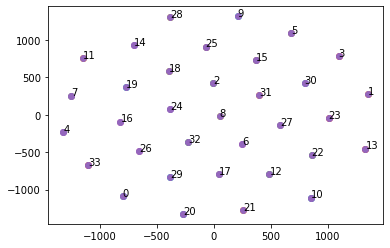

In [80]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100,perplexity=8)
transformed = model.fit_transform(output)
xs = transformed[:,0]
ys = transformed[:,1]

for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.text(xs[i],ys[i],i)
plt.scatter(xs,ys)
#plt.text(xs,ys)

plt.show()